In [191]:
import matplotlib
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{color}')

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
from scipy import stats

import pandas as pd
import numpy as np
import math

import json
from os import listdir
from os.path import isfile, join
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time
import seaborn as sns

params = {'legend.fontsize': 14,
          'legend.handlelength': 1.,
          'legend.handletextpad': 0.1}
plt.rcParams.update(params)

statistics_dir = '/home/maniaa/ashes/code/statistics/'
stat_csv = [(statistics_dir + f) for f in listdir(statistics_dir) if (f.endswith(".csv") and isfile(join(statistics_dir, f)))]
stat_csv.sort()
stat_csv = stat_csv[1:]

In [165]:
# Capture queue time
queue_ts = []

for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    
    
    df['queueTime_sec'] = df['queueTime']//1000
    
    n_jobs = len(df);
    queue_ts.append({'total': n_jobs, 'qt<5s': len(df[df['queueTime_sec'] <= 5]),
                    'qt5<20s': len(df[(df['queueTime_sec'] > 5) & (df['queueTime_sec'] <= 20)]),
                    'qt20s<1m': len(df[(df['queueTime_sec'] > 20) & (df['queueTime_sec'] <= 60)]),
                    'qt1m<5m': len(df[(df['queueTime_sec'] > 60) & (df['queueTime_sec'] <= 300)]),
                    'qt5m<30m': len(df[(df['queueTime_sec'] > 300) & (df['queueTime_sec'] <= 1800)]),
                    'qt30m<': len(df[df['queueTime_sec'] > 1800]),
                    'max': df['queueTime_sec'].max(), 'min': df['queueTime_sec'].min()})
    
    if index == 30:
        break

qts_df = pd.DataFrame(queue_ts)

qts_df[r'$<$5 sec']=100*qts_df['qt<5s']/qts_df['total']
qts_df[r'$<$20 sec']=100*qts_df['qt5<20s']/qts_df['total']
qts_df[r'$<$1 min']=100*qts_df['qt20s<1m']/qts_df['total']
qts_df[r'$<$5 min']=100*qts_df['qt1m<5m']/qts_df['total']
qts_df[r'$<$30 min']=100*qts_df['qt5m<30m']/qts_df['total']
qts_df[r'$>$30 min']=100*qts_df['qt30m<']/qts_df['total']

/home/maniaa/ashes/code/statistics/08-02-2018.csv
/home/maniaa/ashes/code/statistics/08-03-2018.csv
/home/maniaa/ashes/code/statistics/08-04-2018.csv
/home/maniaa/ashes/code/statistics/08-05-2018.csv
/home/maniaa/ashes/code/statistics/08-06-2018.csv
/home/maniaa/ashes/code/statistics/08-07-2018.csv
/home/maniaa/ashes/code/statistics/08-08-2018.csv
/home/maniaa/ashes/code/statistics/08-09-2018.csv
/home/maniaa/ashes/code/statistics/08-10-2018.csv
/home/maniaa/ashes/code/statistics/08-11-2018.csv
/home/maniaa/ashes/code/statistics/08-12-2018.csv
/home/maniaa/ashes/code/statistics/08-13-2018.csv
/home/maniaa/ashes/code/statistics/08-14-2018.csv
/home/maniaa/ashes/code/statistics/08-15-2018.csv
/home/maniaa/ashes/code/statistics/08-16-2018.csv
/home/maniaa/ashes/code/statistics/08-17-2018.csv
/home/maniaa/ashes/code/statistics/08-18-2018.csv
/home/maniaa/ashes/code/statistics/08-19-2018.csv
/home/maniaa/ashes/code/statistics/08-20-2018.csv
/home/maniaa/ashes/code/statistics/08-21-2018.csv


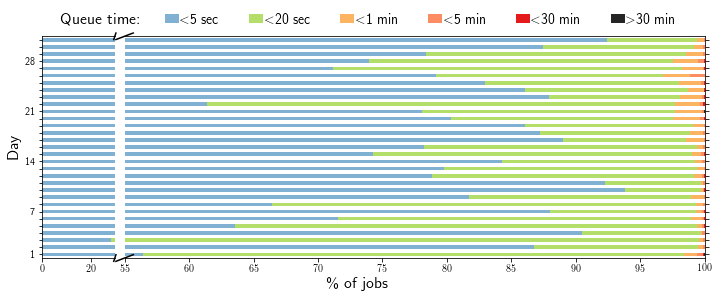

In [240]:
colors = ['#80b1d3', '#b3de69', '#fdb462', '#fc8d62', '#e41a1c','#252525']
fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 8]}, figsize=(10,4))

qts_df[[r'$<$5 sec', r'$<$20 sec', r'$<$1 min', r'$<$5 min', r'$<$30 min', r'$>$30 min']].plot.barh(ax=ax, stacked=True, legend=False, color=colors)
qts_df[[r'$<$5 sec', r'$<$20 sec', r'$<$1 min', r'$<$5 min', r'$<$30 min', r'$>$30 min']].plot.barh(ax=ax2, stacked=True, color=colors) 

ax2.set_xlim(55, 100)
ax.set_xlim(0, 30)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()

def format_ytickspweek(y, pos=None):
    if (int(y)+1)%7 == 0:
        return str(int(y)+1)
    if y == 0:
        return 1
    return ''

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_ytickspweek))
ax2.set_xlabel(r'\% of jobs', fontsize=16)
ax2.xaxis.set_label_coords(0.4, -0.08)
ax.set_ylabel("Day", fontsize=16)

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax2.text(50, 32.8, "Queue time:", size=16, rotation=0,
         ha="left", va="center",
         bbox=dict(boxstyle="round",
                   ec='w', #'#bdbdbd',
                   fc='w',# (1., 0.8, 0.8),
                   )) #bbox=dict(facecolor='red', alpha=0.5)
ax2.legend(bbox_to_anchor=(0.06, 1.02, 0.9, .102), loc=3,
           ncol=6, mode="expand", borderaxespad=0., frameon=False)

plt.subplots_adjust(wspace=0.03)

plt.subplots_adjust(left=0.06, bottom=0.13, right=0.98, top=0.9)
fig.savefig('/home/maniaa/ashes/drawings/fig_jobqueuetime_30days_expand.pdf', format='pdf', dpi=200)
fig.savefig('/home/maniaa/ashes/drawings/fig_jobqueuetime_30days_expand.png', format='png', dpi=200)
plt.show()


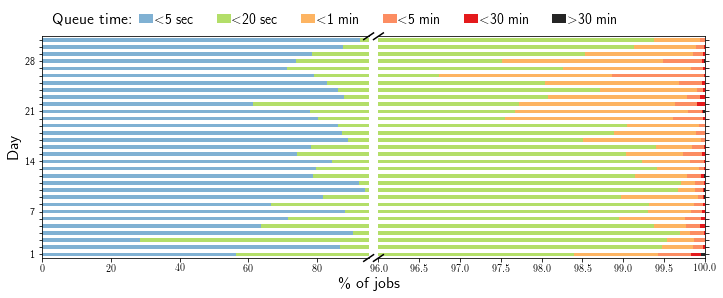

In [252]:
colors = ['#80b1d3', '#b3de69', '#fdb462', '#fc8d62', '#e41a1c','#252525']

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 1]}, figsize=(10,4))

qts_df[[r'$<$5 sec', r'$<$20 sec', r'$<$1 min', r'$<$5 min', r'$<$30 min', r'$>$30 min']].plot.barh(ax=ax, stacked=True, legend=False, color=colors)
qts_df[[r'$<$5 sec', r'$<$20 sec', r'$<$1 min', r'$<$5 min', r'$<$30 min', r'$>$30 min']].plot.barh(ax=ax2, stacked=True, color=colors) 

ax2.set_xlim(96, 100)  # outliers only
ax.set_xlim(0, 95)  # most of the data

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()

def format_ytickspweek(y, pos=None):
    if (int(y)+1)%7 == 0:
        return str(int(y)+1)
    if y == 0:
        return 1
    return ''

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_ytickspweek))
ax2.set_xlabel(r'\% of jobs', fontsize=16)
ax2.xaxis.set_label_coords(-0.03, -0.08)
ax.set_ylabel("Day", fontsize=16)

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax2.text(92, 32.8, "Queue time:", size=16, rotation=0,
         ha="left", va="center",
         bbox=dict(boxstyle="round", ec='w', fc='w')) 
ax2.legend(bbox_to_anchor=(-0.75, 1.02, 1.5, .102), loc=3,
           ncol=6, mode="expand", borderaxespad=0., frameon=False)

plt.subplots_adjust(wspace=0.03)

plt.subplots_adjust(left=0.06, bottom=0.13, right=0.98, top=0.9)
fig.savefig('/home/maniaa/ashes/drawings/fig_jobqueuetime_30days_verbose.pdf', format='pdf', dpi=200)
fig.savefig('/home/maniaa/ashes/drawings/fig_jobqueuetime_30days_verbose.png', format='png', dpi=200)

plt.show()


In [286]:
for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    dir_name = f.split('/')[-1].split('.csv')[0]
    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    
    break;

/home/maniaa/ashes/code/statistics/08-02-2018.csv


job_1531656020138_223618 17 has waves


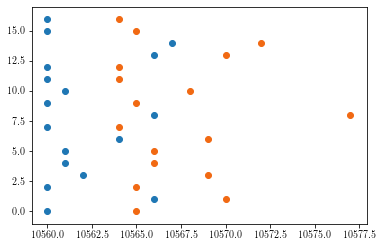

job_1531656020138_223446 36 has waves


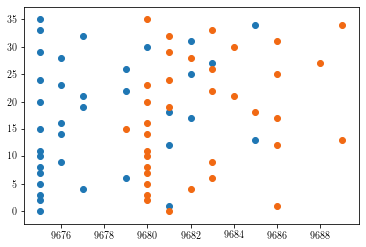

job_1531656020138_223019 19 has waves


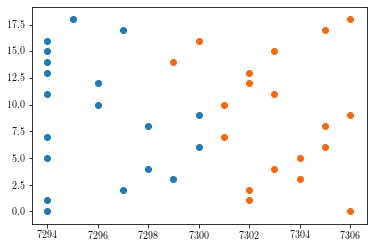

job_1531656020138_232947 3989 has waves


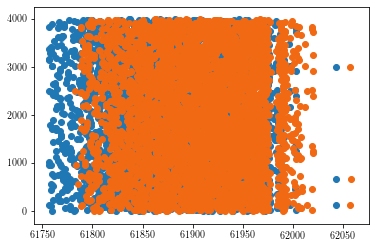

job_1531656020138_222815 133 has waves


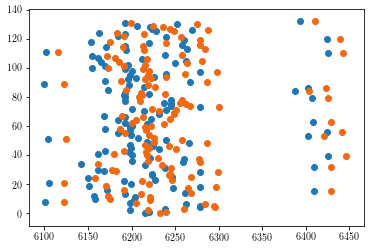

job_1531656020138_224945 93 has waves


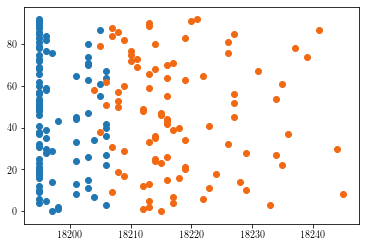

job_1531656020138_223033 8 has waves


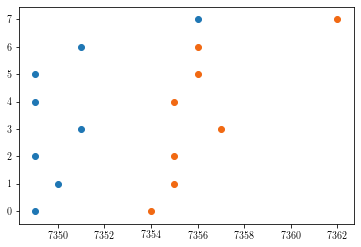

job_1531656020138_227162 133 has waves


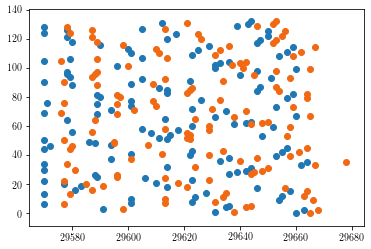

job_1531656020138_232942 100 has waves


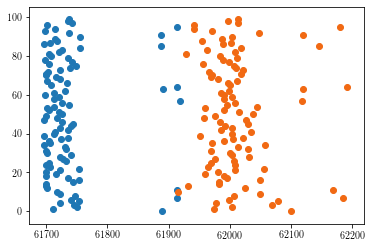

job_1531656020138_232198 15 has waves


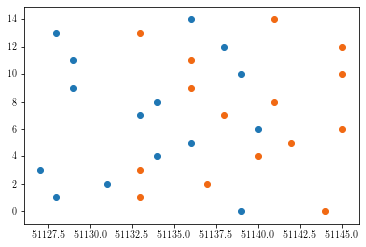

job_1531656020138_229808 68 has waves


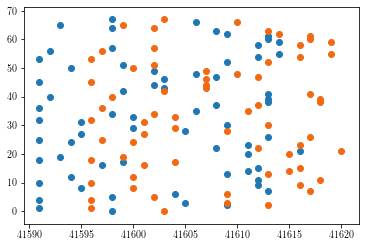

job_1531656020138_223336 26 has waves


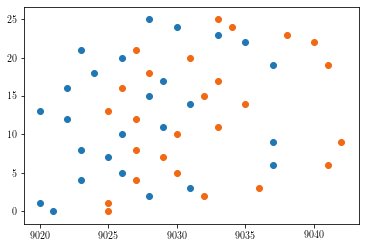

job_1531656020138_223307 409 has waves


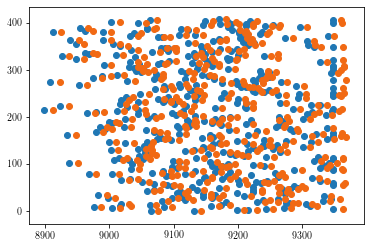

job_1531656020138_233164 185 has waves


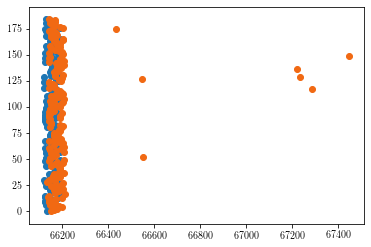

job_1531656020138_224527 9 has waves


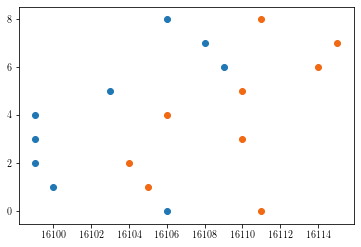

job_1531656020138_223572 89 has waves


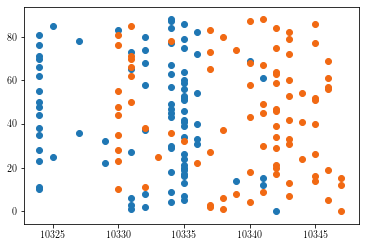

job_1531656020138_227584 25 has waves


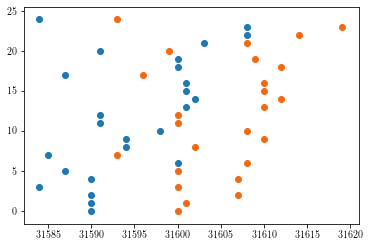

job_1531656020138_226721 38 has waves


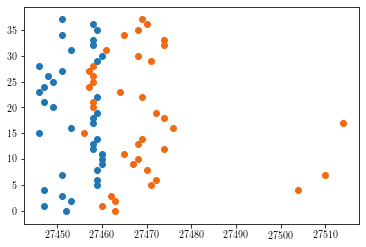

job_1531656020138_234251 2596 has waves


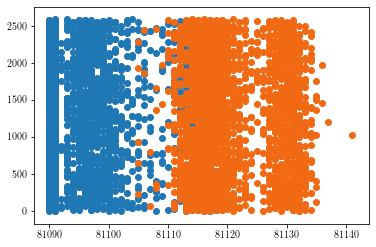

job_1531656020138_229984 28 has waves


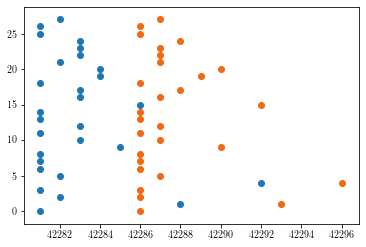

job_1531656020138_223323 25 has waves


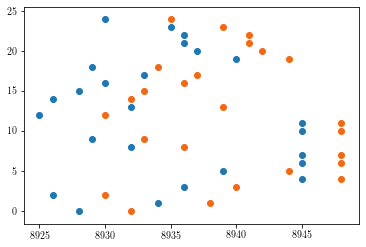

job_1531656020138_225092 2 has waves


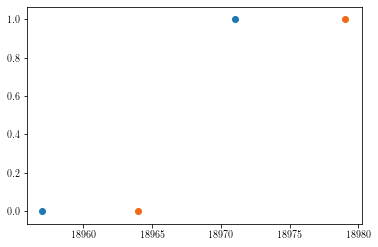

job_1531656020138_224100 114 has waves


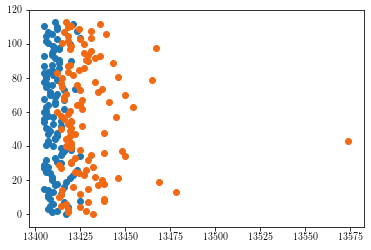

job_1531656020138_223147 1433 has waves


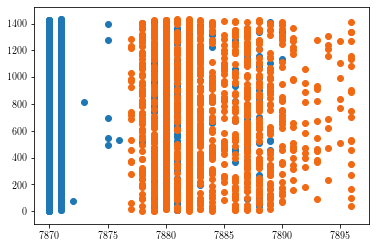

job_1531656020138_232478 9 has waves


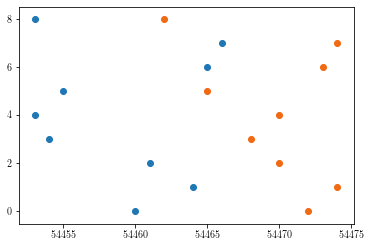

job_1531656020138_232575 18 has waves


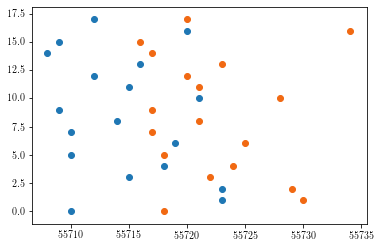

job_1531656020138_224251 10 has waves


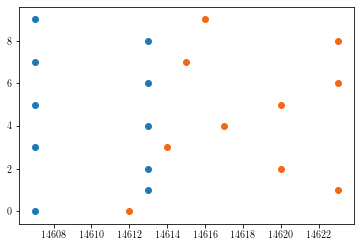

job_1531656020138_222351 72 has waves


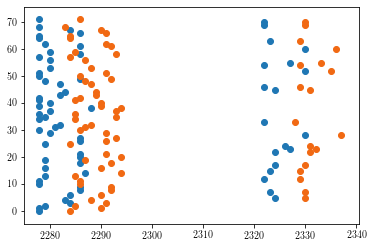

job_1531656020138_232987 2988 has waves


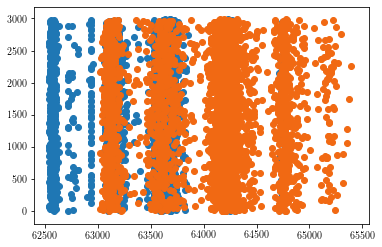

job_1531656020138_223809 1433 has waves


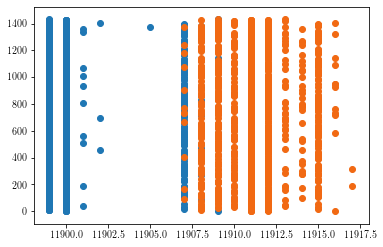

job_1531656020138_224674 23 has waves


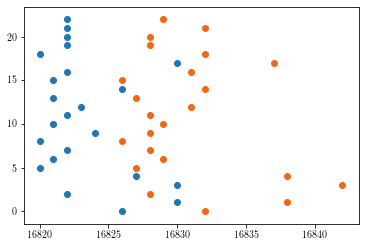

job_1531656020138_224247 72 has waves


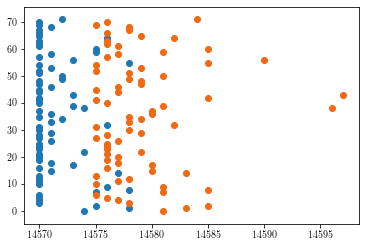

job_1531656020138_226540 35 has waves


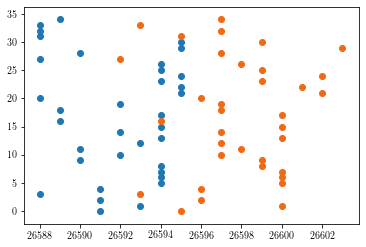

job_1531656020138_222780 100 has waves


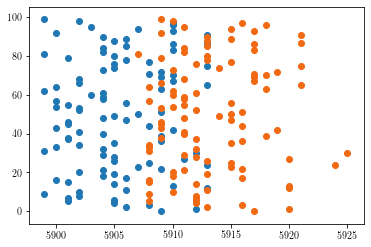

job_1531656020138_230442 3100 has waves


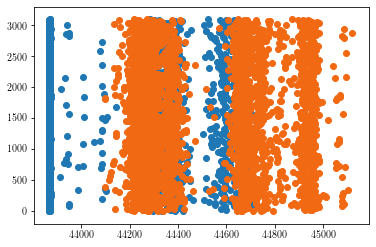

job_1531656020138_229934 100 has waves


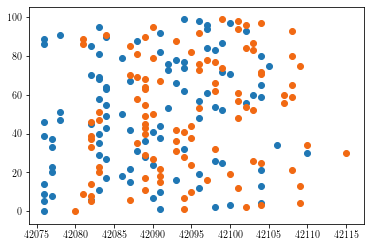

job_1531656020138_227498 22 has waves


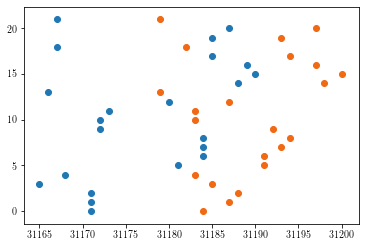

job_1531656020138_226753 38 has waves


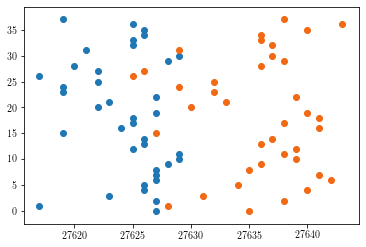

job_1531656020138_229951 100 has waves


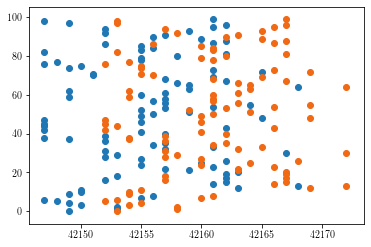

job_1531656020138_224566 25 has waves


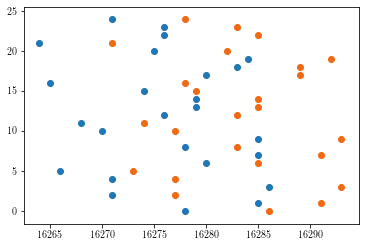

job_1531656020138_223310 409 has waves


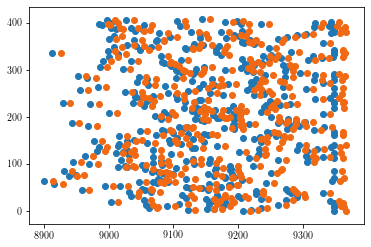

job_1531656020138_228992 2 has waves


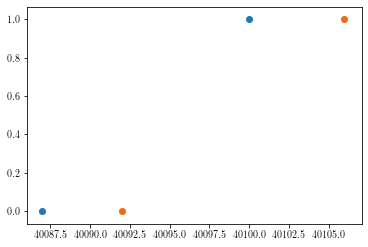

job_1531656020138_223395 83 has waves


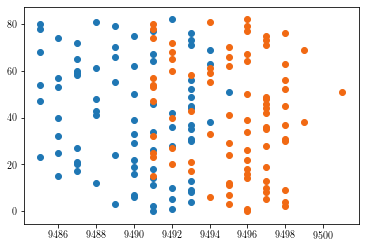

job_1531656020138_232905 7 has waves


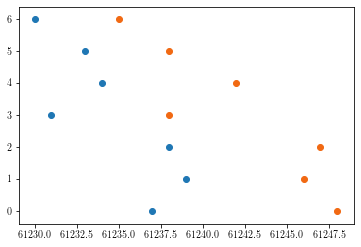

job_1531656020138_223006 20 has waves


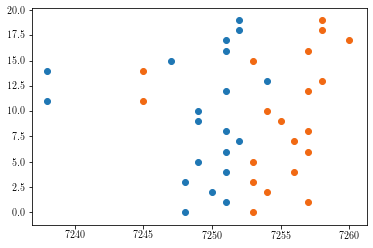

job_1531656020138_223306 409 has waves


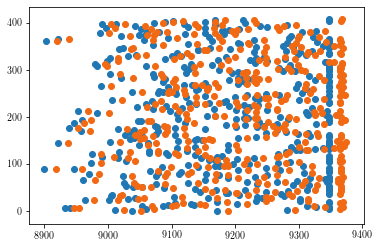

job_1531656020138_222637 615 has waves


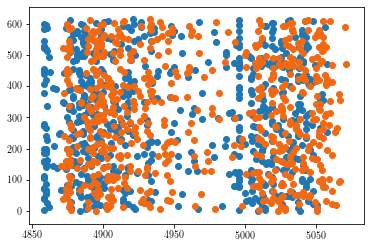

job_1531656020138_225925 11 has waves


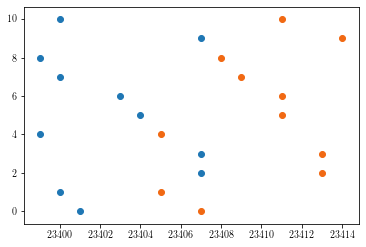

job_1531656020138_227139 46 has waves


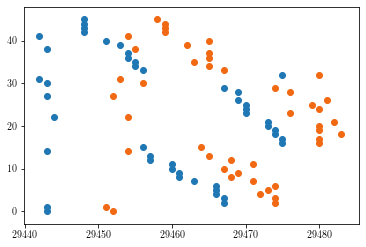

job_1531656020138_223381 25 has waves


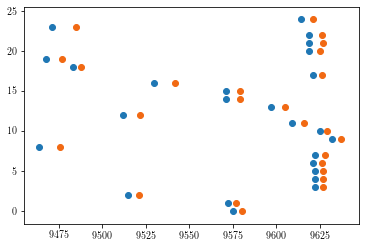

job_1531656020138_227367 133 has waves


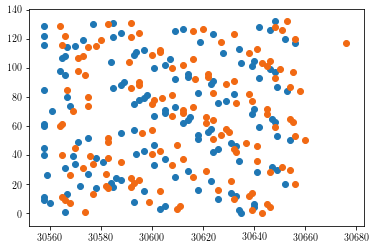

job_1531656020138_227979 55 has waves


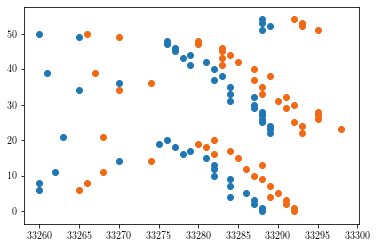

job_1531656020138_232396 1337 has waves


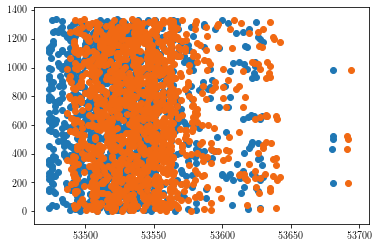

job_1531656020138_232404 7 has waves


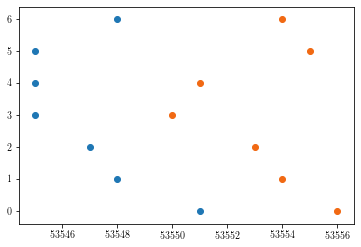

job_1531656020138_223213 114 has waves


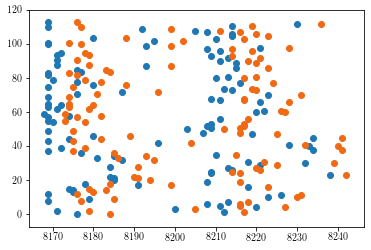

job_1531656020138_232572 248 has waves


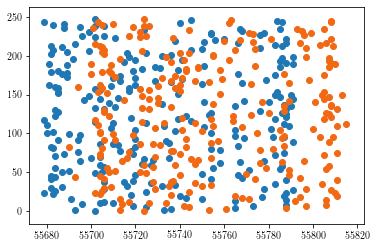

job_1531656020138_232136 9 has waves


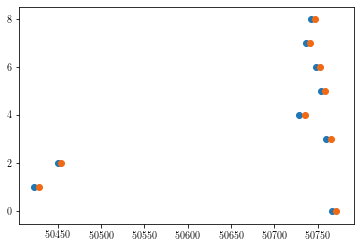

job_1531656020138_228060 55 has waves


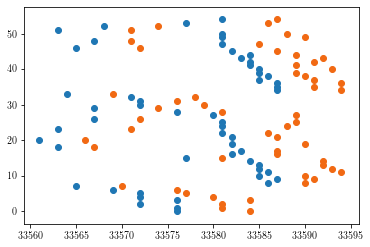

job_1531656020138_223596 24 has waves


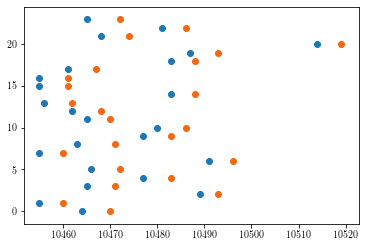

job_1531656020138_223535 409 has waves


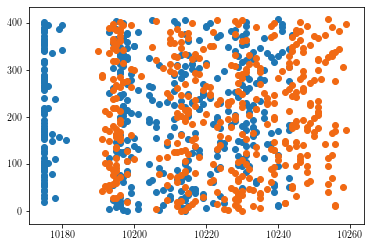

job_1531656020138_232117 7 has waves


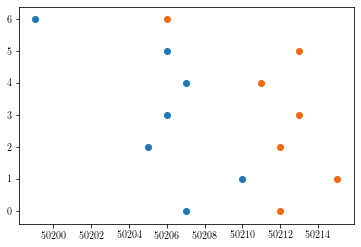

job_1531656020138_222154 105 has waves


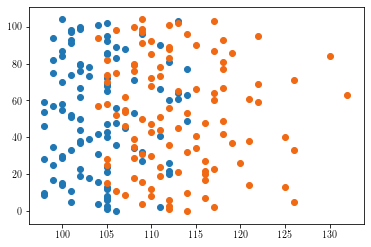

job_1531656020138_222848 6089 has waves


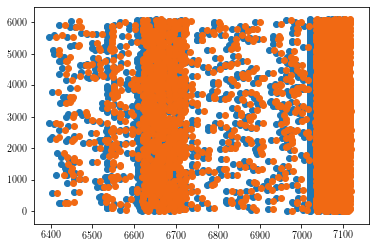

job_1531656020138_224295 50 has waves


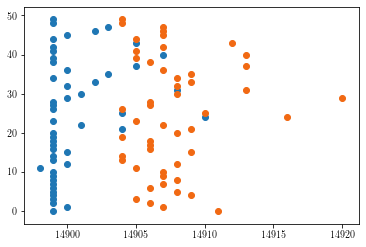

job_1531656020138_223393 77 has waves


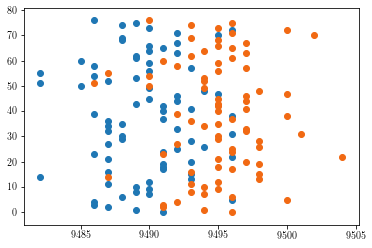

job_1531656020138_232736 7066 has waves


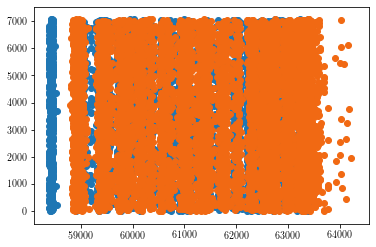

job_1531656020138_222700 88 has waves


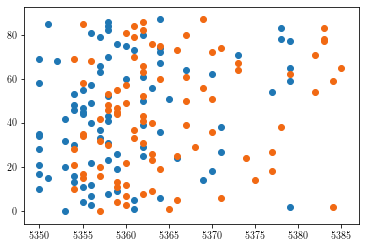

job_1531656020138_227907 55 has waves


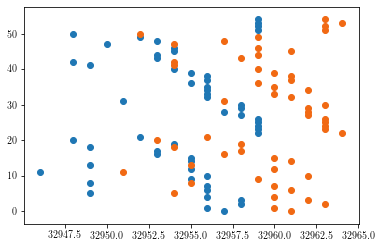

job_1531656020138_223399 89 has waves


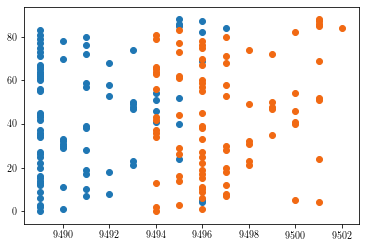

job_1531656020138_229912 300 has waves


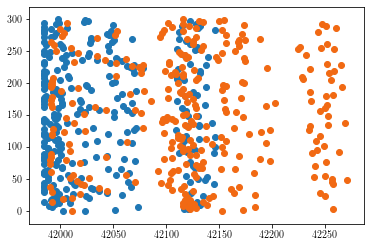

job_1531656020138_223641 3075 has waves


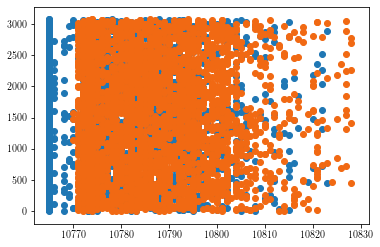

job_1531656020138_234582 598 has waves


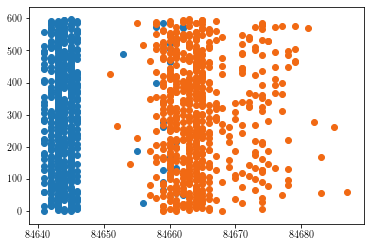

job_1531656020138_224311 5098 has waves


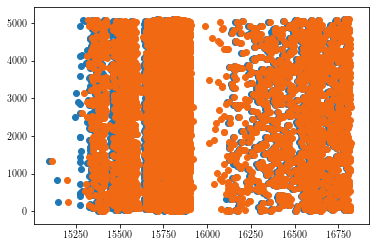

job_1531656020138_232188 7066 has waves


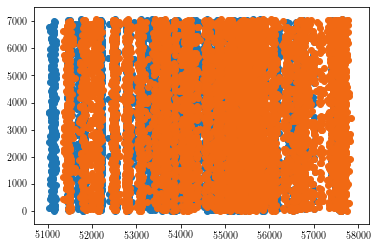

job_1531656020138_222899 5098 has waves


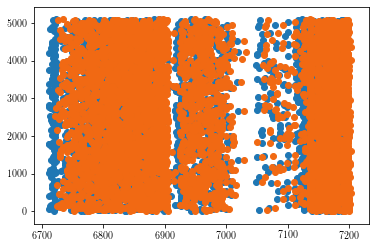

job_1531656020138_224273 26 has waves


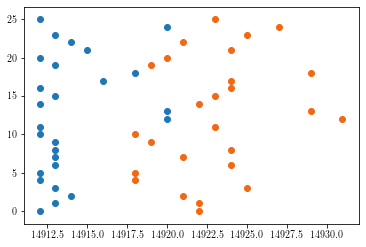

job_1531656020138_229632 90 has waves


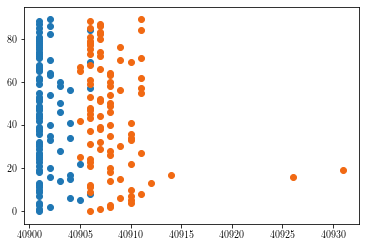

job_1531656020138_223533 409 has waves


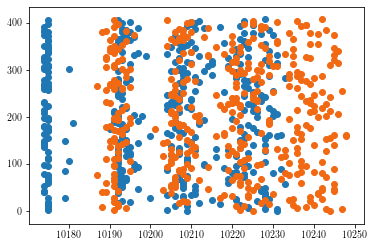

job_1531656020138_230000 100 has waves


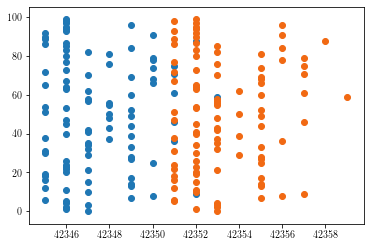

job_1531656020138_229926 39 has waves


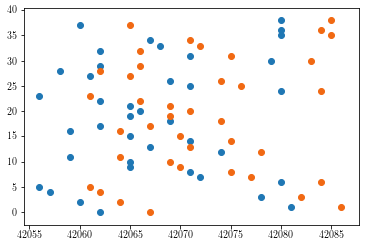

job_1531656020138_224742 24 has waves


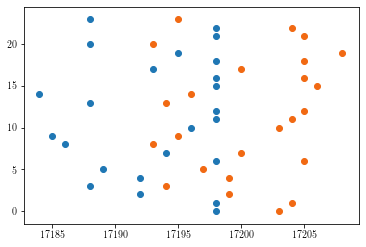

job_1531656020138_222269 1029 has waves


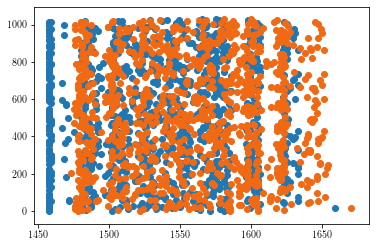

job_1531656020138_229584 83 has waves


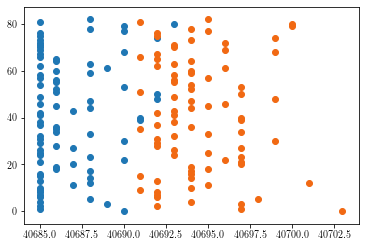

job_1531656020138_232143 802 has waves


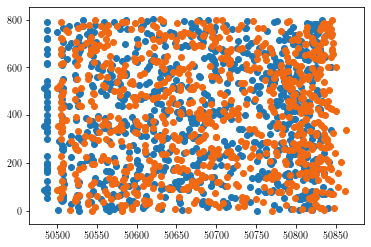

job_1531656020138_224604 23 has waves


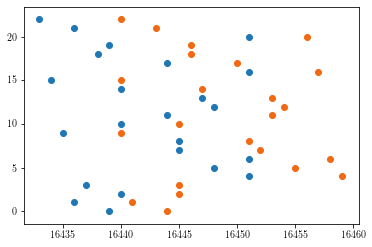

job_1531656020138_224338 561 has waves


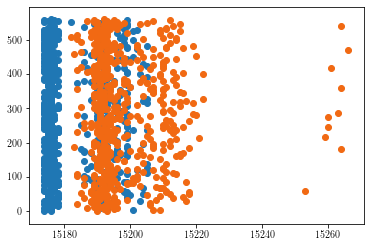

job_1531656020138_233270 7 has waves


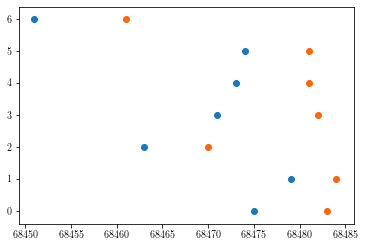

job_1531656020138_223190 1433 has waves


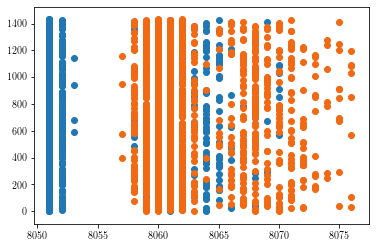

job_1531656020138_222379 24 has waves


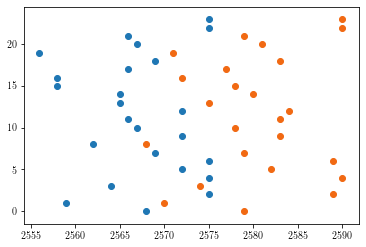

job_1531656020138_230629 300 has waves


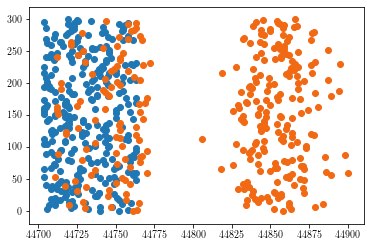

job_1531656020138_223309 409 has waves


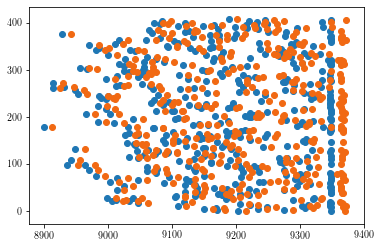

job_1531656020138_233122 1021 has waves


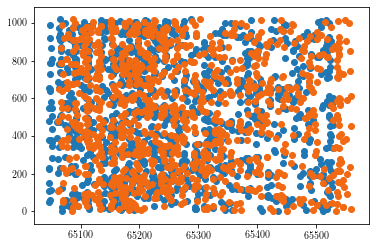

job_1531656020138_222798 72 has waves


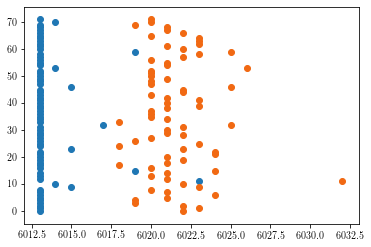

job_1531656020138_233262 2988 has waves


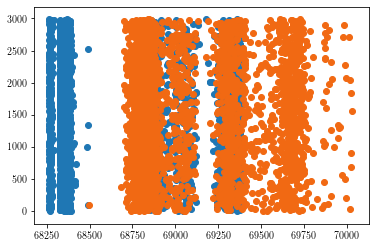

job_1531656020138_222309 1834 has waves


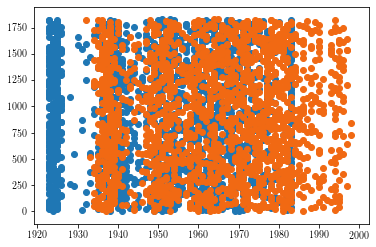

job_1531656020138_232207 306 has waves


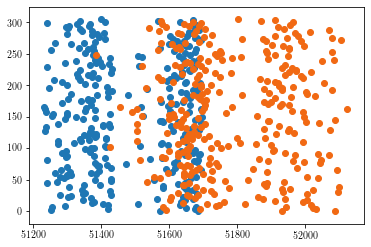

job_1531656020138_232605 325 has waves


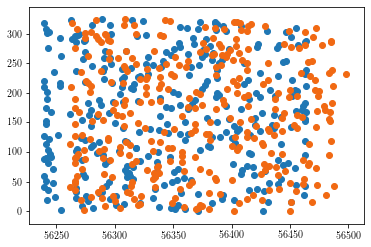

job_1531656020138_227222 133 has waves


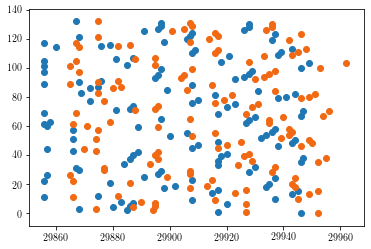

job_1531656020138_224381 491 has waves


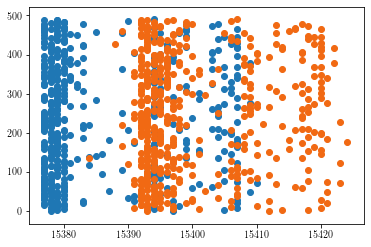

job_1531656020138_222621 39 has waves


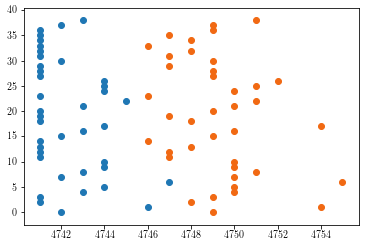

job_1531656020138_223312 25 has waves


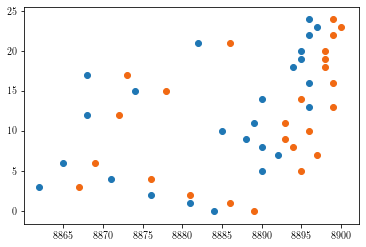

job_1531656020138_222460 520 has waves


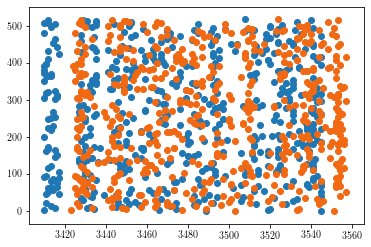

job_1531656020138_223575 25 has waves


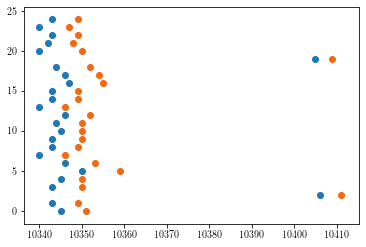

job_1531656020138_230013 100 has waves


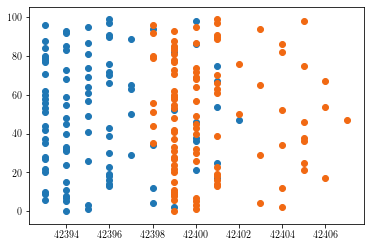

job_1531656020138_223580 3 has waves


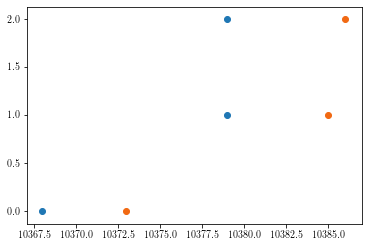

job_1531656020138_228682 48 has waves


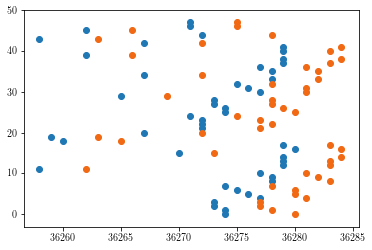

job_1531656020138_223296 25 has waves


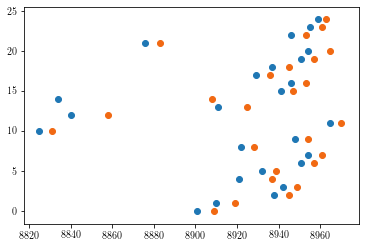

job_1531656020138_224919 231 has waves


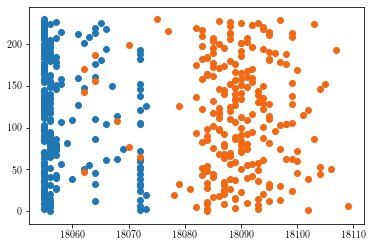

job_1531656020138_232432 1073 has waves


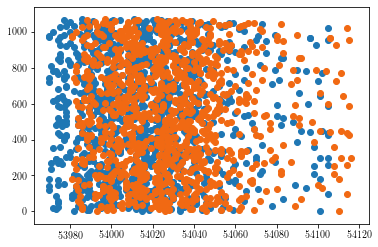

job_1531656020138_232879 76 has waves


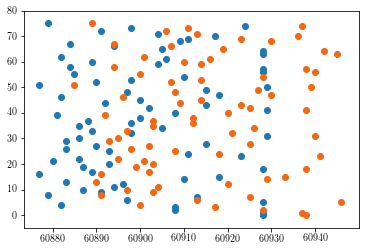

job_1531656020138_222779 360 has waves


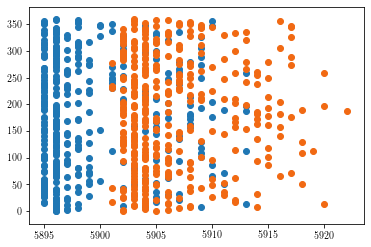

job_1531656020138_222695 7790 has waves


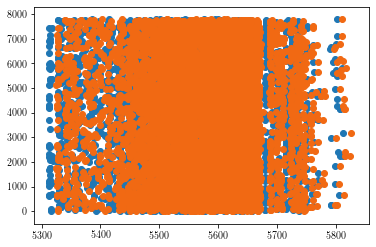

job_1531656020138_224580 54 has waves


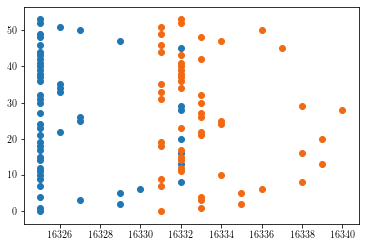

job_1531656020138_222311 128 has waves


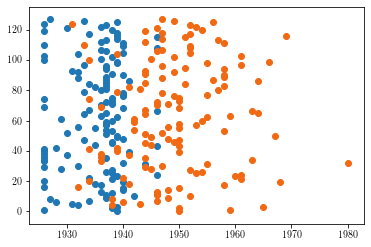

job_1531656020138_229826 68 has waves


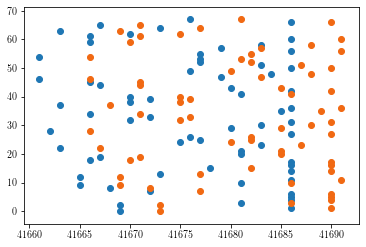

job_1531656020138_232924 124 has waves


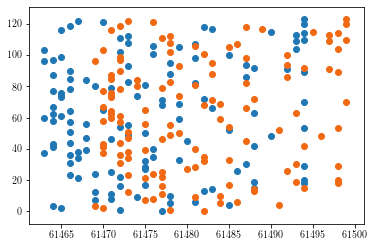

job_1531656020138_232184 6 has waves


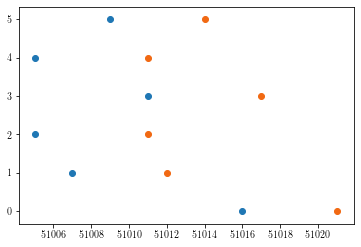

job_1531656020138_224154 86 has waves


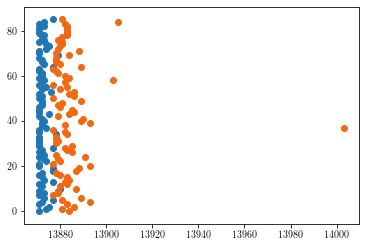

job_1531656020138_232165 10 has waves


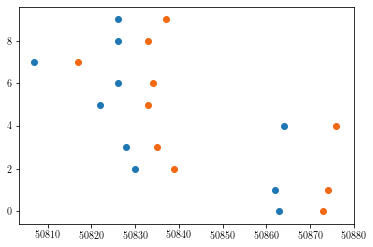

job_1531656020138_232287 98 has waves


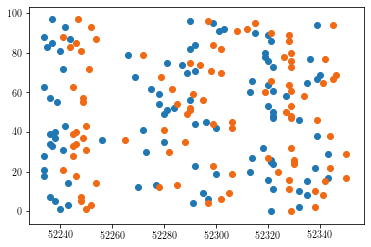

job_1531656020138_224369 72 has waves


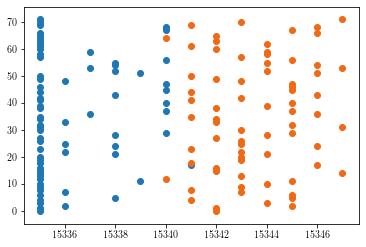

job_1531656020138_226461 5094 has waves


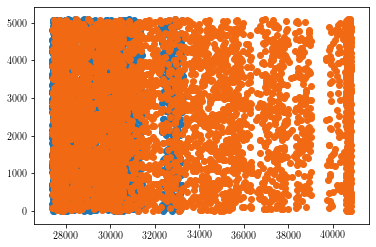

job_1531656020138_222756 10270 has waves


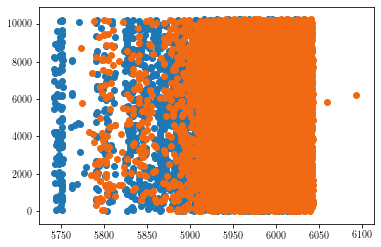

job_1531656020138_222364 89 has waves


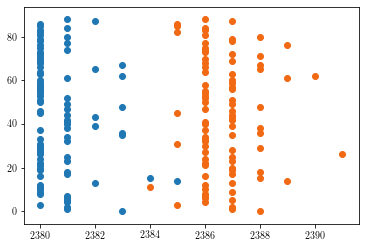

job_1531656020138_223593 91 has waves


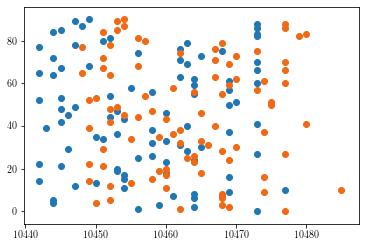

job_1531656020138_232590 3989 has waves


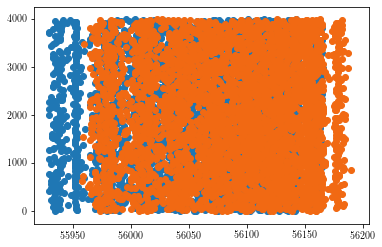

job_1531656020138_229967 200 has waves


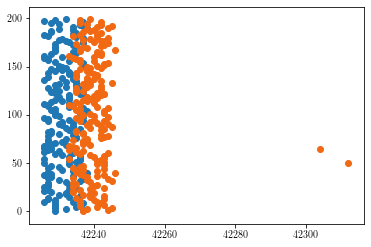

job_1531656020138_232493 72 has waves


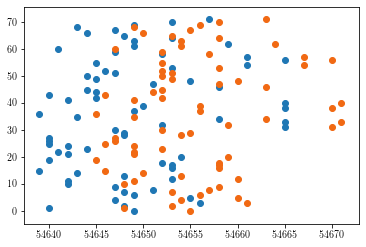

job_1531656020138_232317 47 has waves


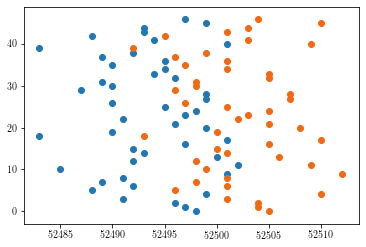

job_1531656020138_232315 102 has waves


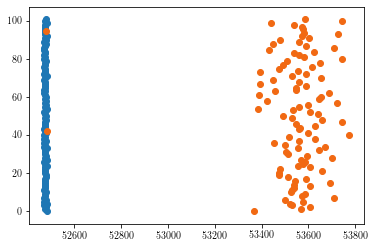

job_1531656020138_234263 91 has waves


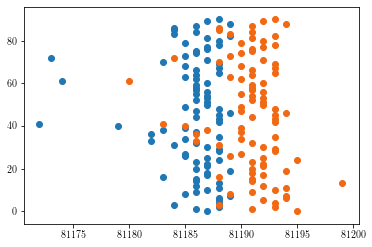

job_1531656020138_229688 3 has waves


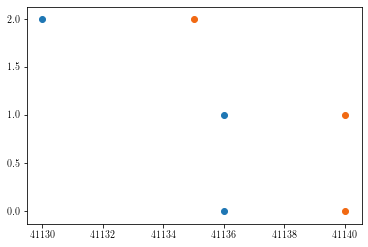

job_1531656020138_233171 2988 has waves


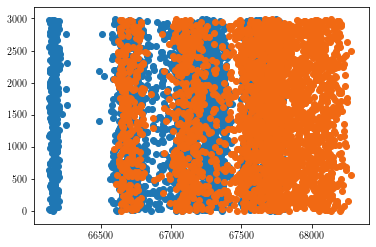

job_1531656020138_229954 290 has waves


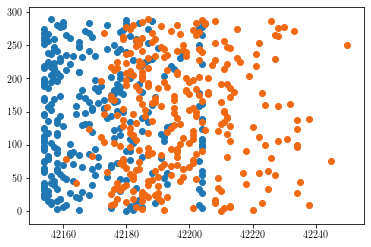

job_1531656020138_230494 3100 has waves


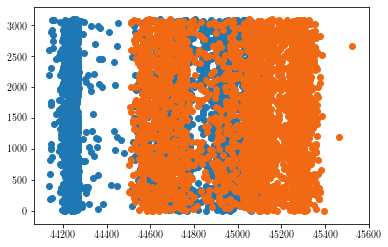

job_1531656020138_232120 11 has waves


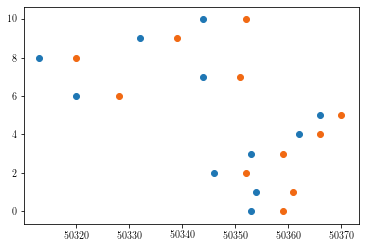

job_1531656020138_223265 18 has waves


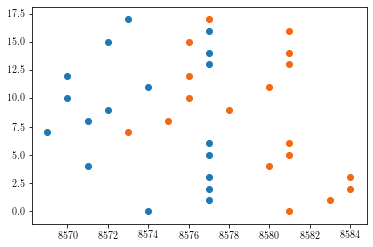

job_1531656020138_230103 28 has waves


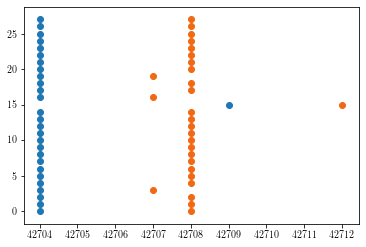

job_1531656020138_233078 16 has waves


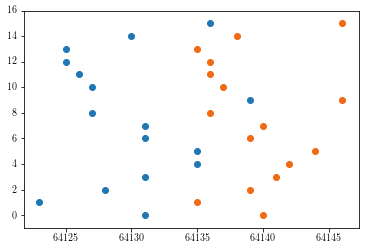

job_1531656020138_224720 9 has waves


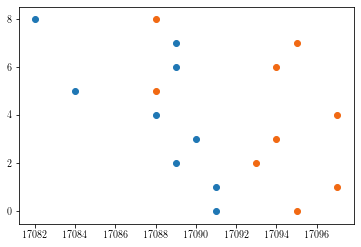

job_1531656020138_223954 24 has waves


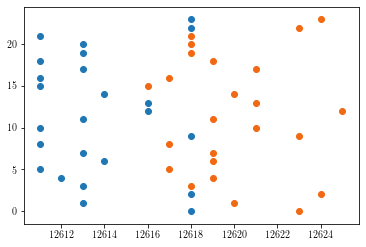

job_1531656020138_223534 409 has waves


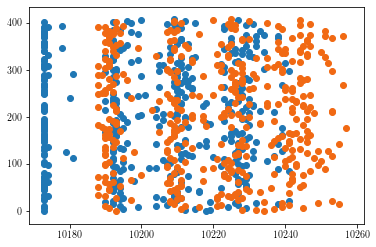

job_1531656020138_222341 1813 has waves


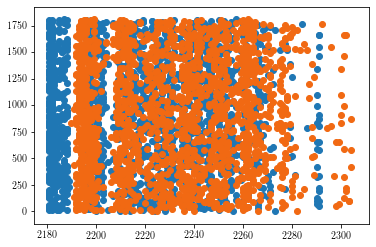

job_1531656020138_233065 2988 has waves


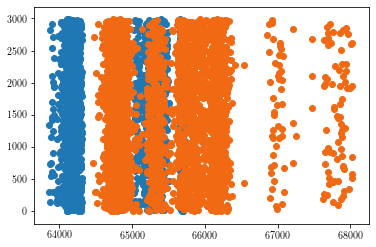

job_1531656020138_222424 13890 has waves


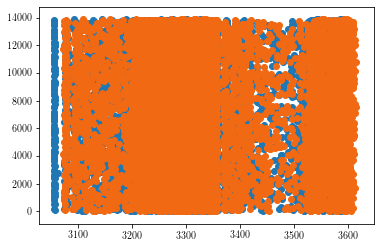

job_1531656020138_223525 409 has waves


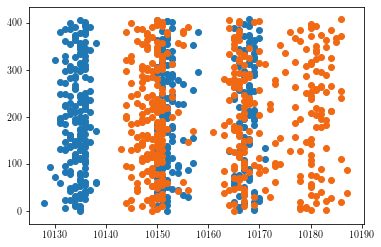

job_1531656020138_223947 13890 has waves


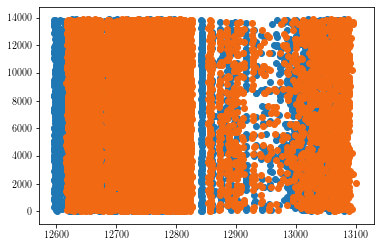

job_1531656020138_223228 74 has waves


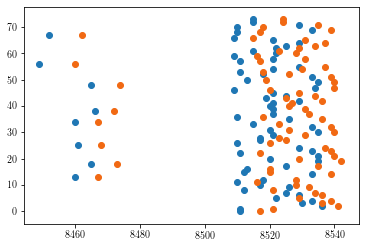

job_1531656020138_223347 46 has waves


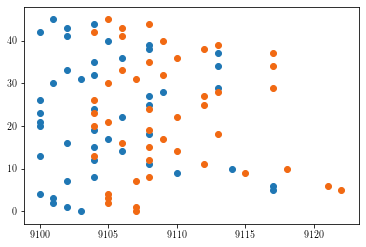

job_1531656020138_223443 28 has waves


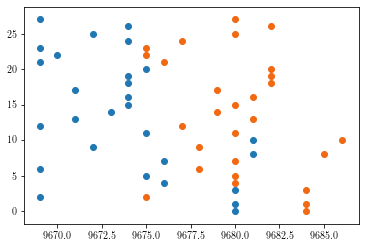

job_1531656020138_232276 325 has waves


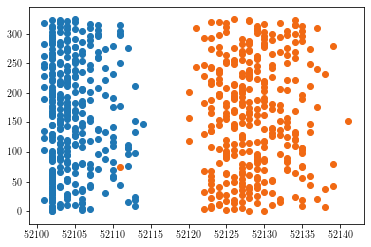

job_1531656020138_222997 11 has waves


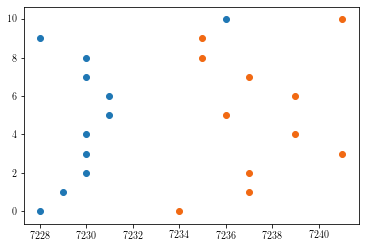

job_1531656020138_232450 63 has waves


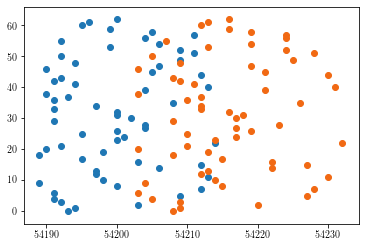

job_1531656020138_222994 6089 has waves


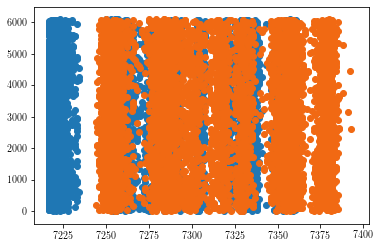

job_1531656020138_222863 100 has waves


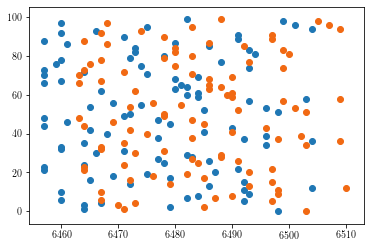

job_1531656020138_222149 319 has waves


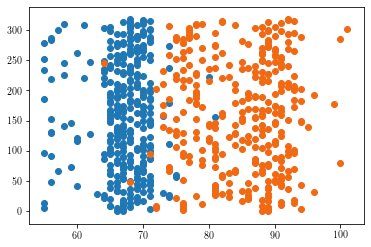

job_1531656020138_232245 802 has waves


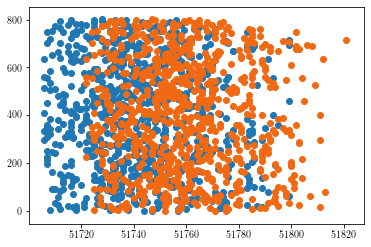

job_1531656020138_224753 20 has waves


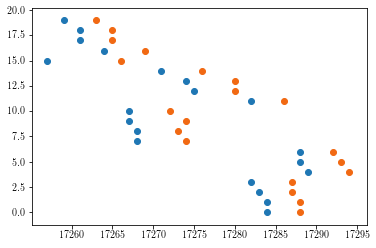

job_1531656020138_223600 92 has waves


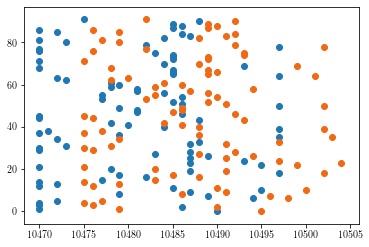

job_1531656020138_222335 92 has waves


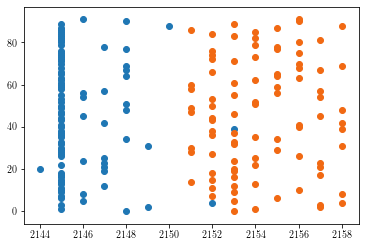

job_1531656020138_224043 339 has waves


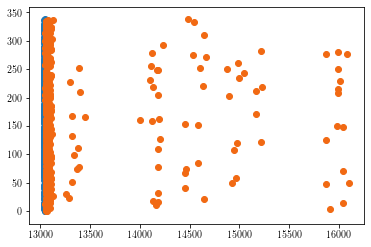

job_1531656020138_223387 4297 has waves


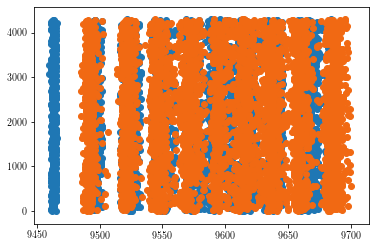

job_1531656020138_234699 2 has waves


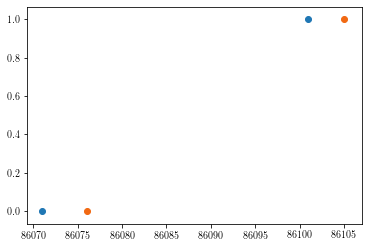

job_1531656020138_222312 2 has waves


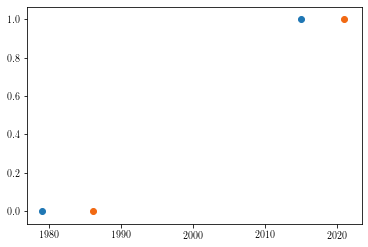

job_1531656020138_224099 27 has waves


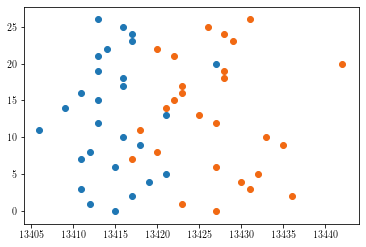

job_1531656020138_232337 306 has waves


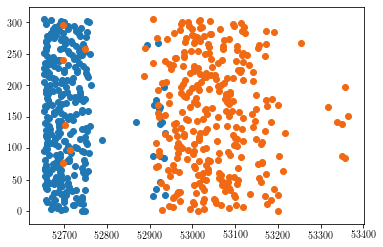

job_1531656020138_234685 3173 has waves


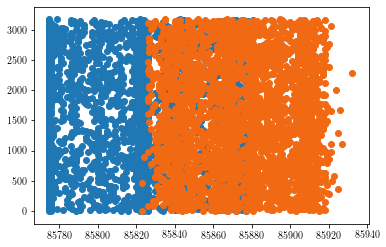

job_1531656020138_224785 19 has waves


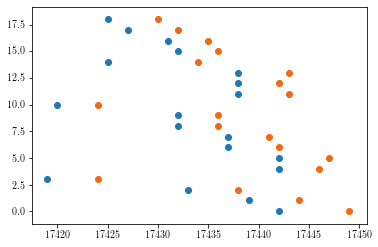

job_1531656020138_224304 25 has waves


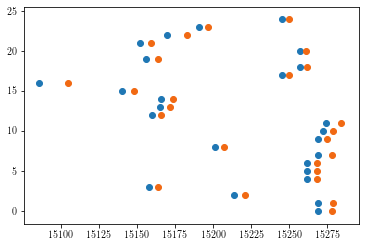

job_1531656020138_232144 3187 has waves


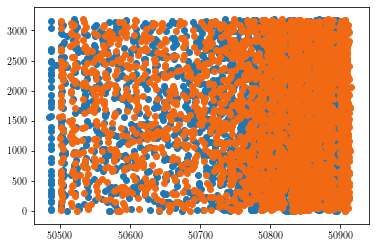

job_1531656020138_224203 24 has waves


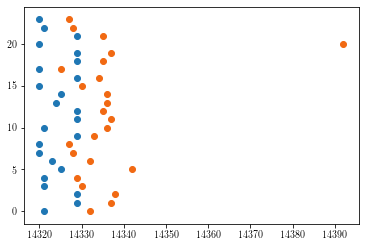

job_1531656020138_223014 506 has waves


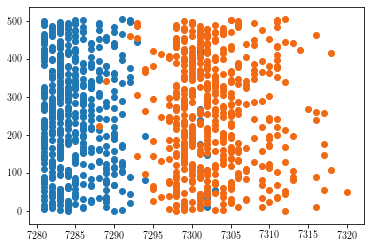

job_1531656020138_222830 34 has waves


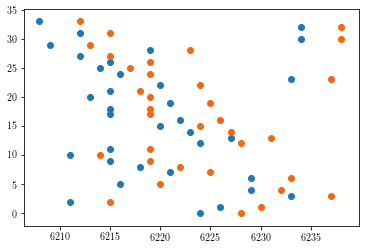

job_1531656020138_223002 114 has waves


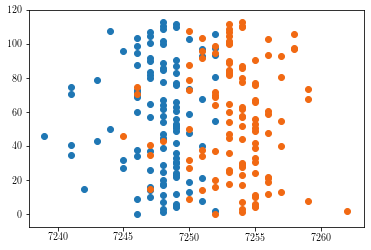

job_1531656020138_232902 100 has waves


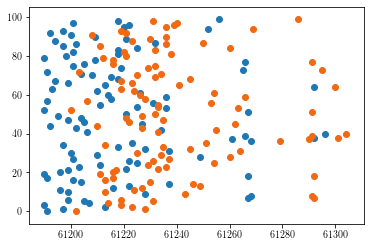

job_1531656020138_230047 29 has waves


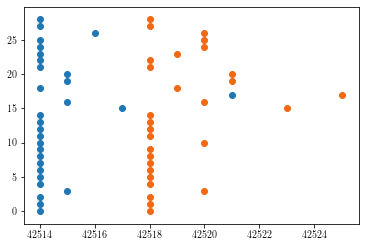

job_1531656020138_225013 2 has waves


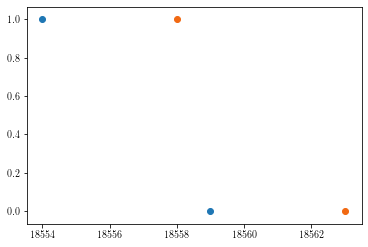

job_1531656020138_223448 114 has waves


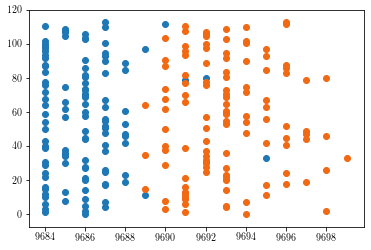

job_1531656020138_222253 168 has waves


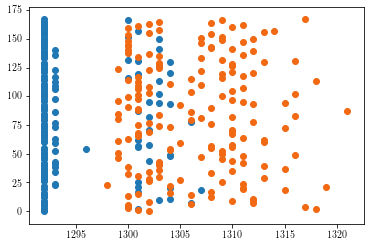

job_1531656020138_233093 11 has waves


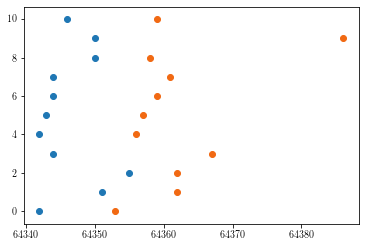

job_1531656020138_223304 2 has waves


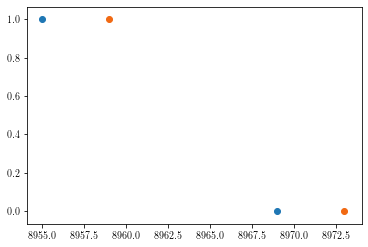

job_1531656020138_232121 250 has waves


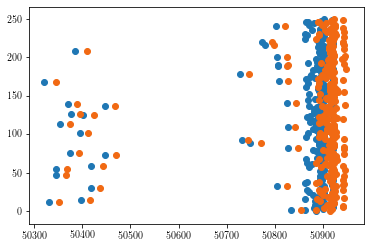

job_1531656020138_224654 22 has waves


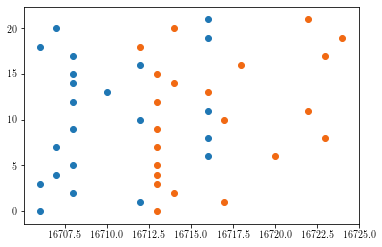

job_1531656020138_224768 25 has waves


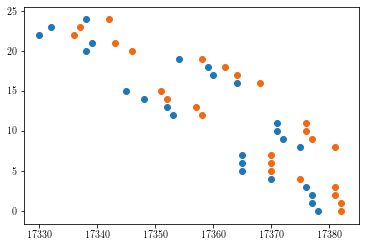

job_1531656020138_222817 360 has waves


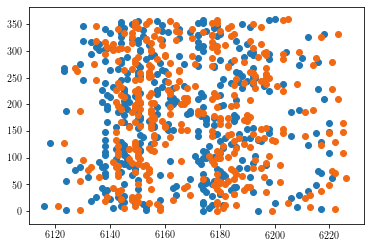

job_1531656020138_232634 325 has waves


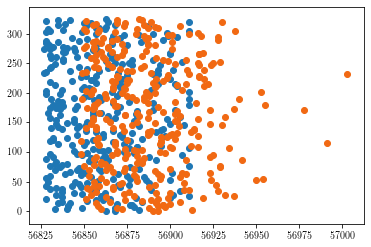

job_1531656020138_232140 801 has waves


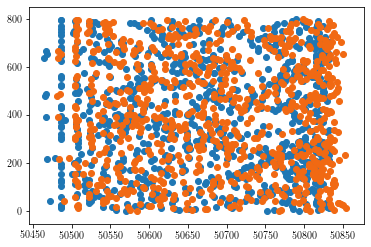

job_1531656020138_234709 11 has waves


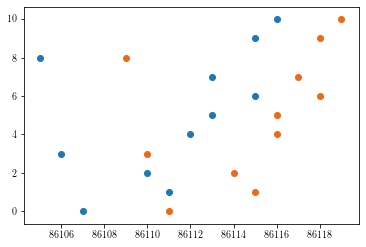

job_1531656020138_224594 21 has waves


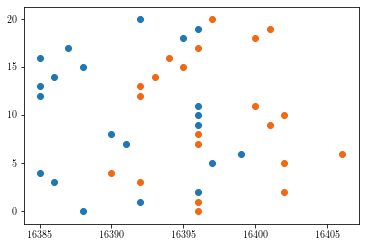

job_1531656020138_223311 409 has waves


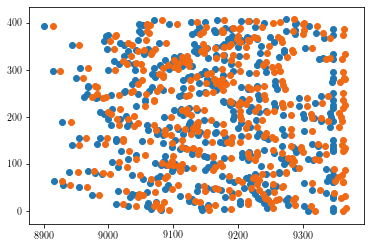

job_1531656020138_222261 71 has waves


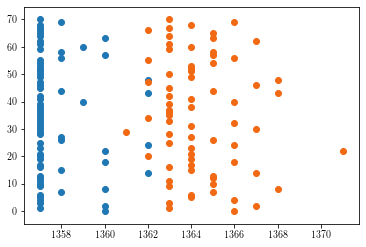

job_1531656020138_225001 2 has waves


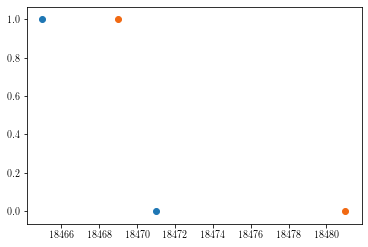

job_1531656020138_224593 249 has waves


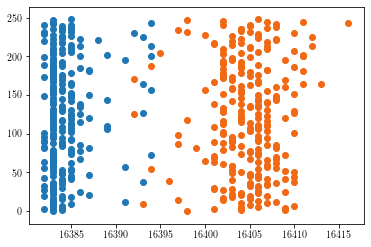

job_1531656020138_223391 74 has waves


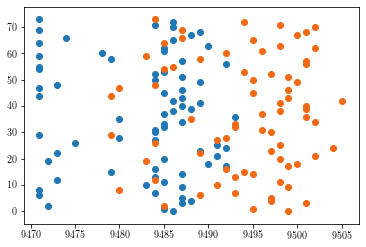

job_1531656020138_224065 14 has waves


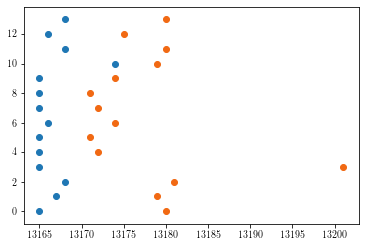

job_1531656020138_227828 55 has waves


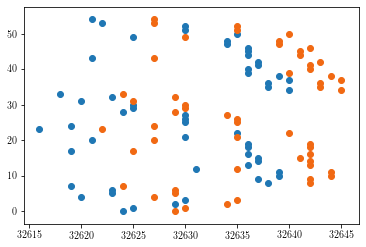

job_1531656020138_222968 21 has waves


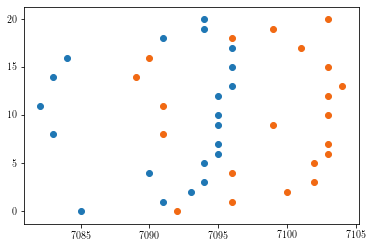

job_1531656020138_222796 360 has waves


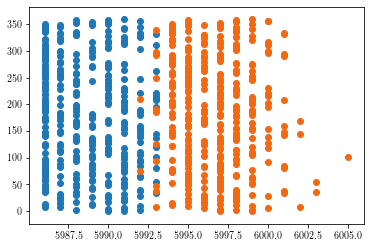

job_1531656020138_226771 32 has waves


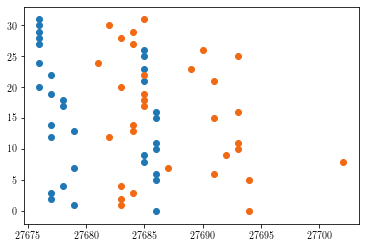

job_1531656020138_223406 85 has waves


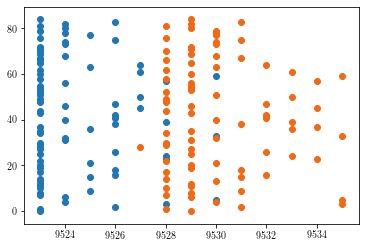

job_1531656020138_227482 25 has waves


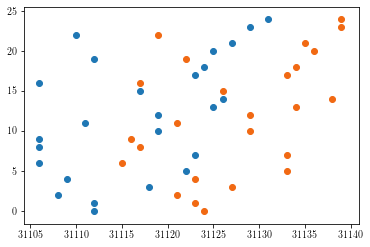

job_1531656020138_223032 22 has waves


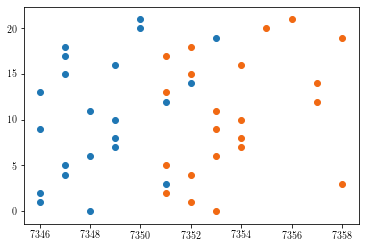

job_1531656020138_232589 178 has waves


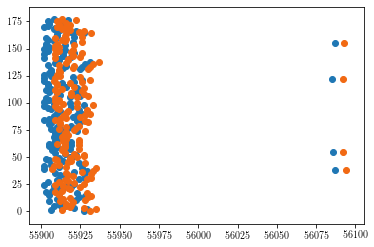

job_1531656020138_232747 23 has waves


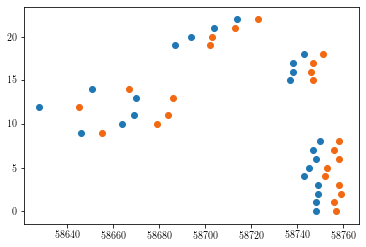

job_1531656020138_222474 87 has waves


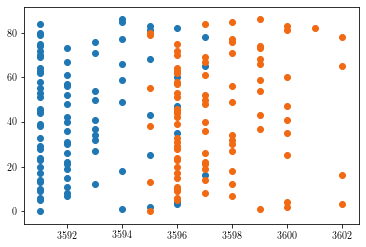

job_1531656020138_232109 2 has waves


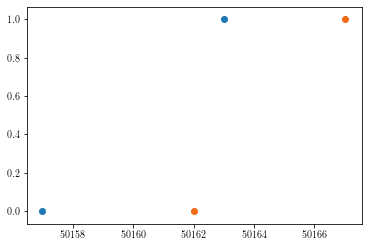

job_1531656020138_224443 491 has waves


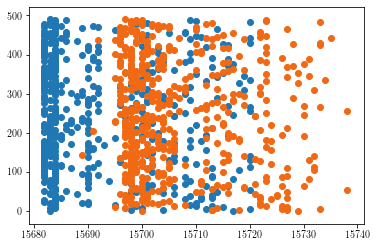

job_1531656020138_229933 7246 has waves


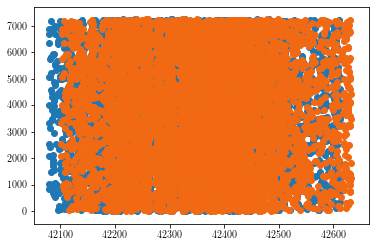

job_1531656020138_222936 487 has waves


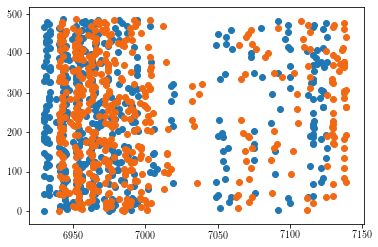

job_1531656020138_224194 25 has waves


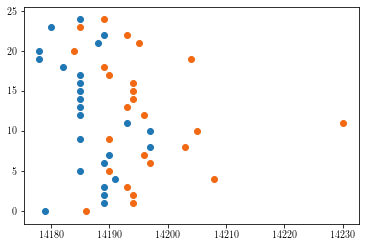

job_1531656020138_226707 83 has waves


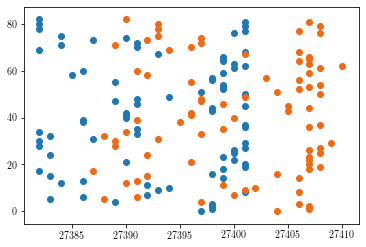

job_1531656020138_224216 89 has waves


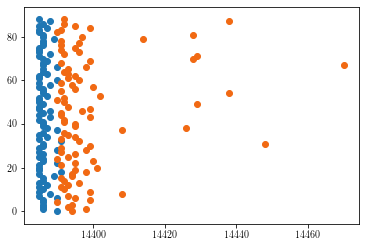

job_1531656020138_232740 87 has waves


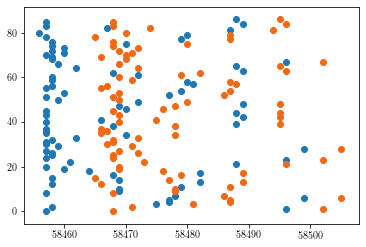

job_1531656020138_223949 802 has waves


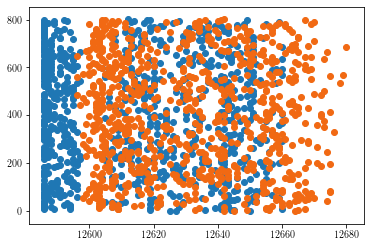

job_1531656020138_227936 3 has waves


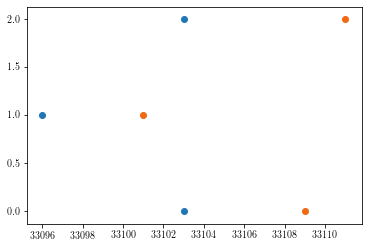

job_1531656020138_224255 72 has waves


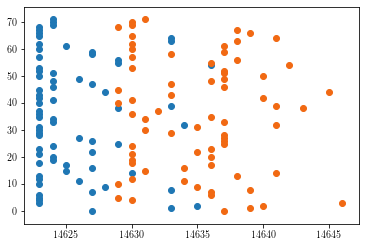

job_1531656020138_222613 488 has waves


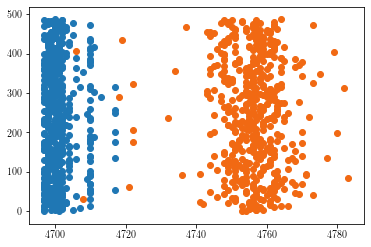

job_1531656020138_223520 409 has waves


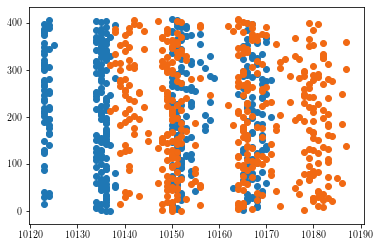

job_1531656020138_232208 2 has waves


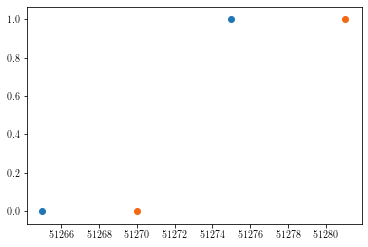

job_1531656020138_223230 114 has waves


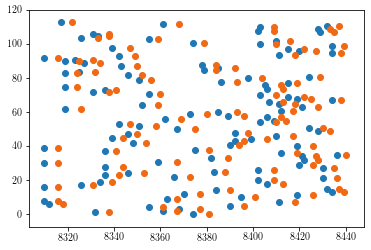

job_1531656020138_233158 178 has waves


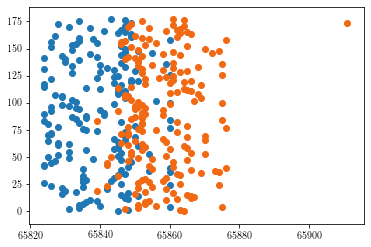

job_1531656020138_222976 43 has waves


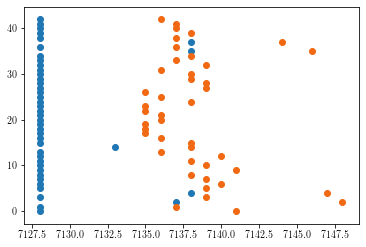

job_1531656020138_225573 76 has waves


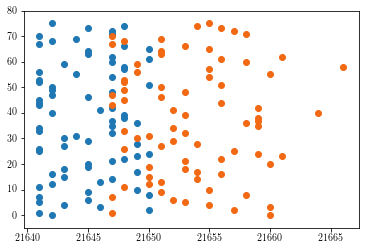

job_1531656020138_224492 13 has waves


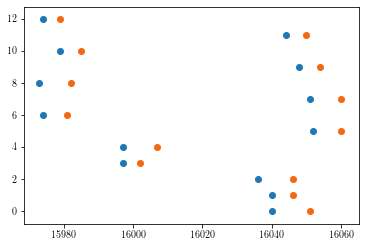

job_1531656020138_226644 32 has waves


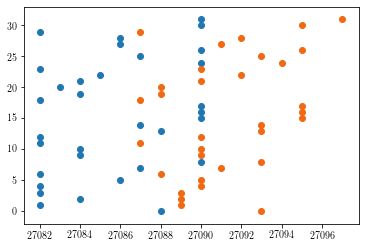

job_1531656020138_224493 2 has waves


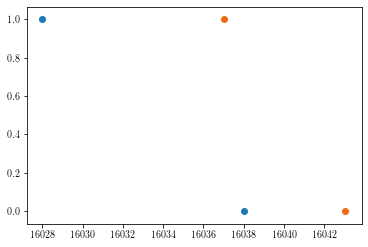

job_1531656020138_232434 90 has waves


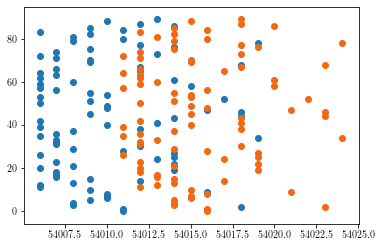

job_1531656020138_222515 15924 has waves


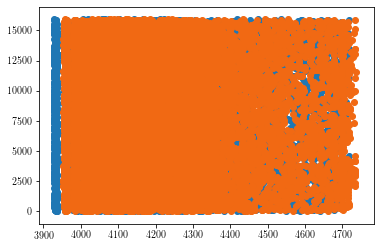

job_1531656020138_227614 3100 has waves


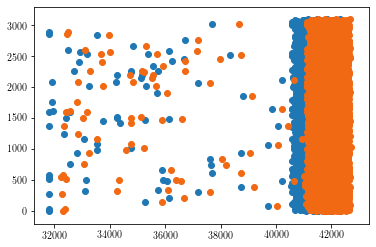

job_1531656020138_234305 3293 has waves


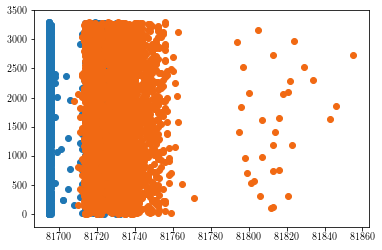

job_1531656020138_233130 1023 has waves


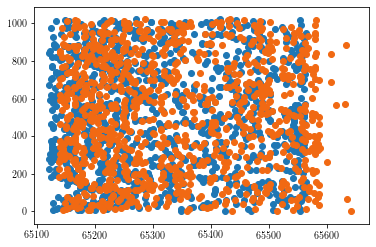

job_1531656020138_223521 409 has waves


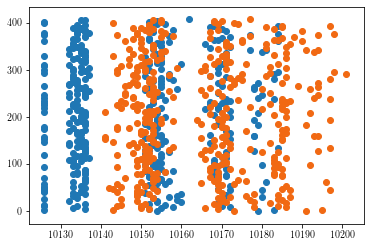

job_1531656020138_228864 23 has waves


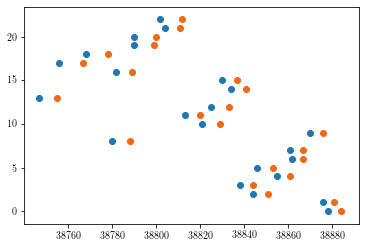

job_1531656020138_222181 22 has waves


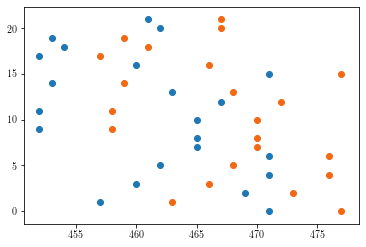

job_1531656020138_223494 3075 has waves


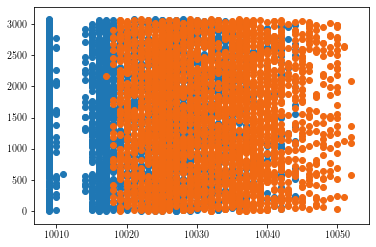

job_1531656020138_230663 300 has waves


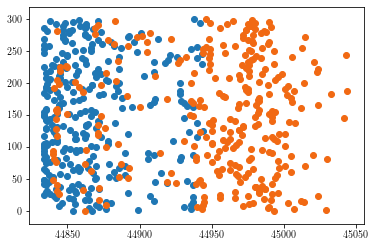

job_1531656020138_222883 91 has waves


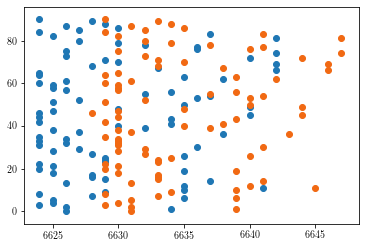

job_1531656020138_232297 7 has waves


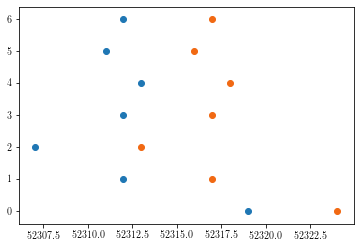

job_1531656020138_229680 72 has waves


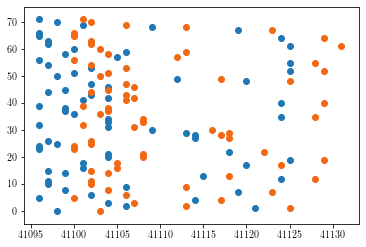

job_1531656020138_222558 522 has waves


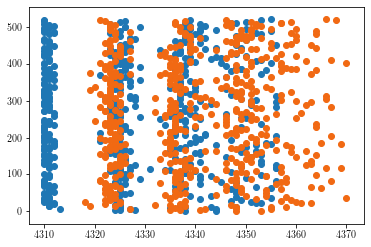

job_1531656020138_223457 81 has waves


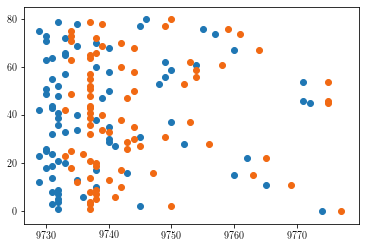

job_1531656020138_222203 20 has waves


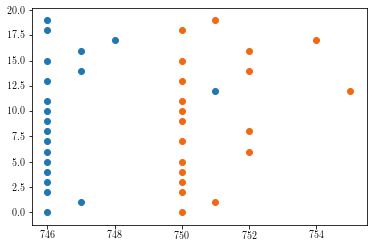

job_1531656020138_224658 17 has waves


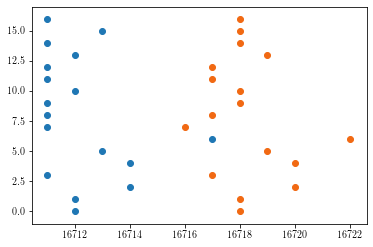

job_1531656020138_232295 57 has waves


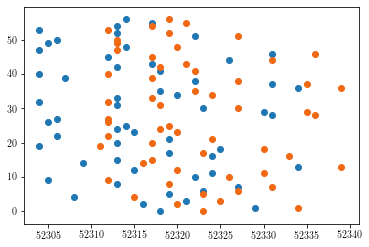

job_1531656020138_232930 490 has waves


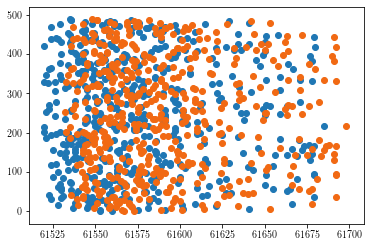

job_1531656020138_229965 100 has waves


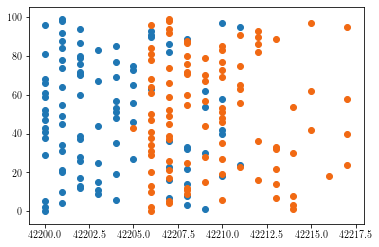

job_1531656020138_232330 325 has waves


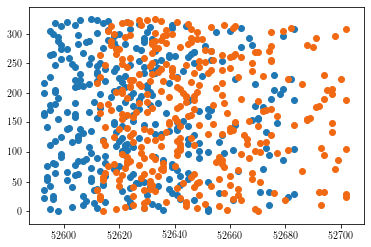

job_1531656020138_223223 55 has waves


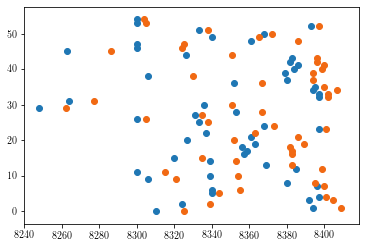

job_1531656020138_226661 484 has waves


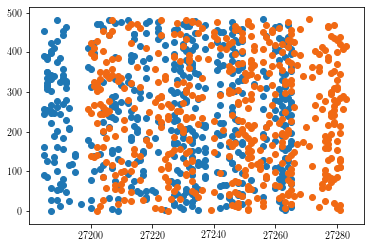

job_1531656020138_223297 12 has waves


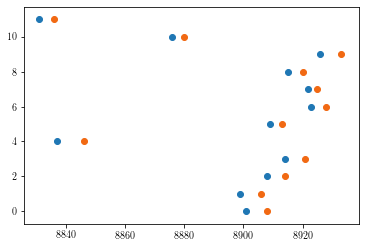

job_1531656020138_234260 3293 has waves


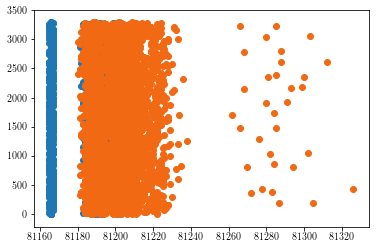

job_1531656020138_222952 702 has waves


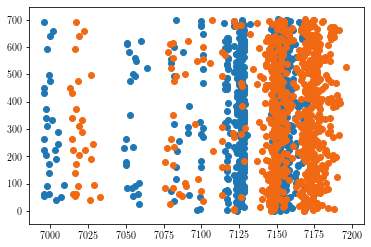

job_1531656020138_232187 7066 has waves


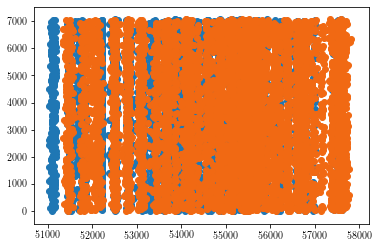

job_1531656020138_224943 479 has waves


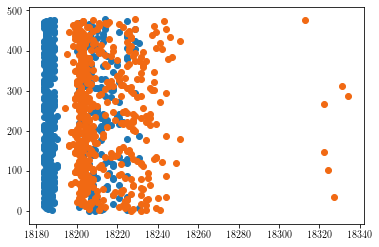

job_1531656020138_224699 87 has waves


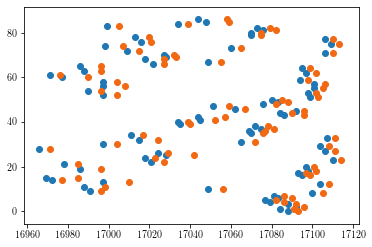

job_1531656020138_229881 1075 has waves


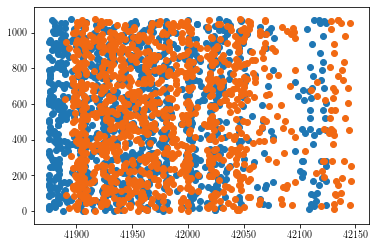

job_1531656020138_229679 68 has waves


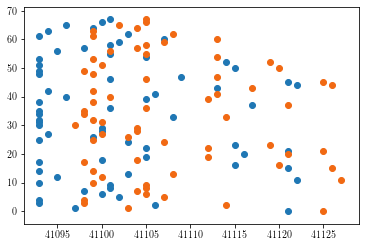

job_1531656020138_223490 30 has waves


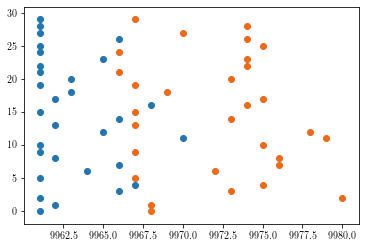

job_1531656020138_227277 133 has waves


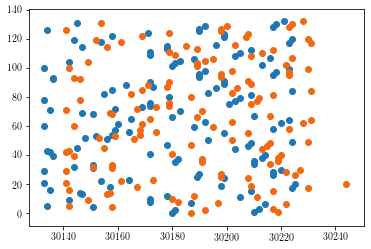

job_1531656020138_225682 83 has waves


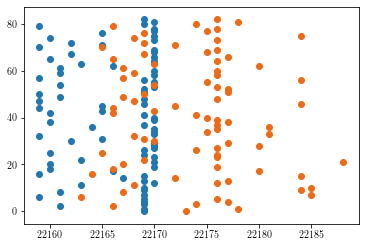

job_1531656020138_223028 146 has waves


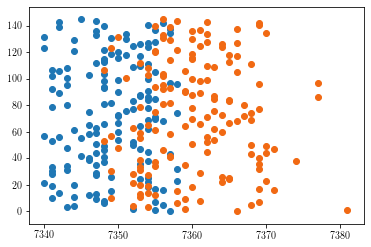

job_1531656020138_222719 360 has waves


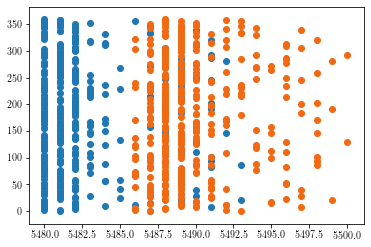

job_1531656020138_233109 10 has waves


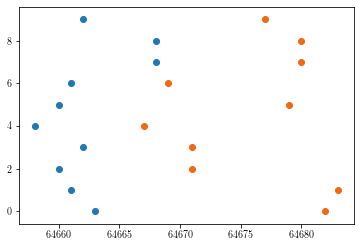

job_1531656020138_223603 60 has waves


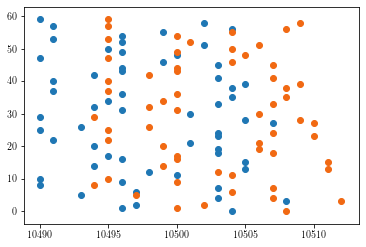

job_1531656020138_232952 133 has waves


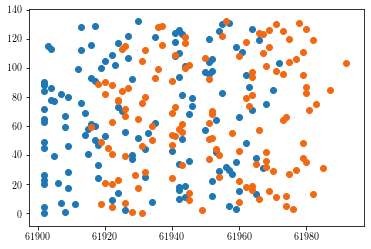

job_1531656020138_229564 135 has waves


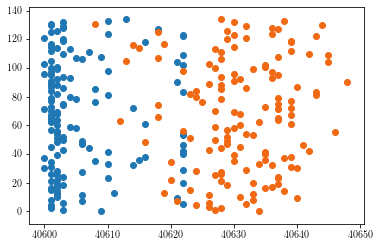

job_1531656020138_223586 94 has waves


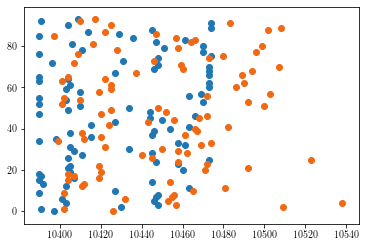

job_1531656020138_231913 7 has waves


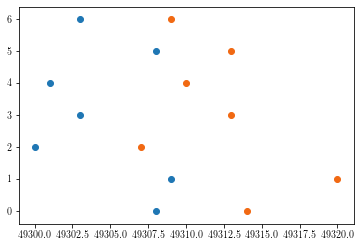

job_1531656020138_224606 46 has waves


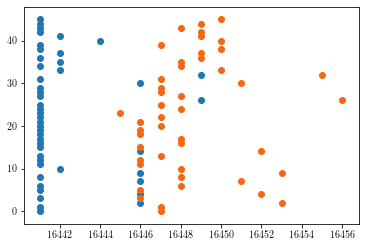

job_1531656020138_229366 6 has waves


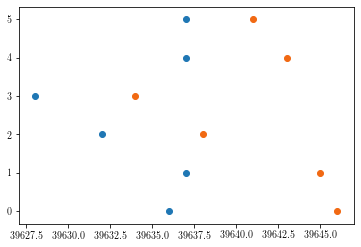

job_1531656020138_227572 23 has waves


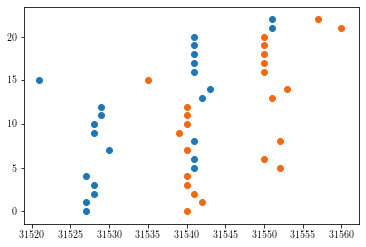

job_1531656020138_222661 66 has waves


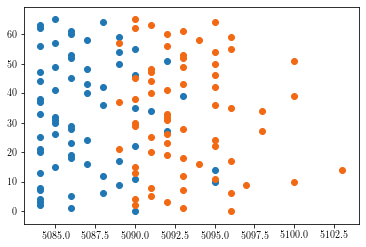

job_1531656020138_224465 45 has waves


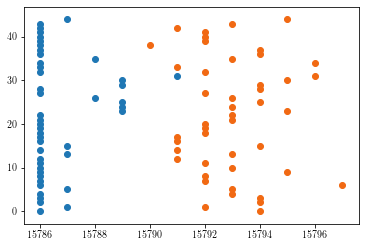

job_1531656020138_222313 25 has waves


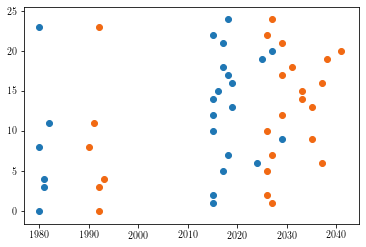

job_1531656020138_223316 735 has waves


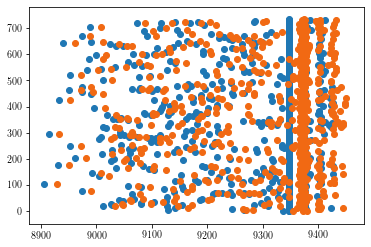

job_1531656020138_229580 489 has waves


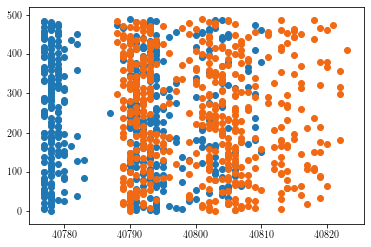

job_1531656020138_223629 107 has waves


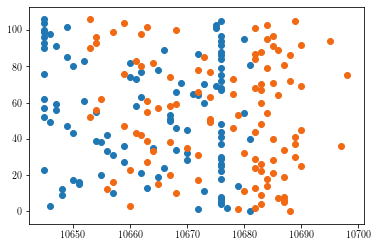

job_1531656020138_223363 6 has waves


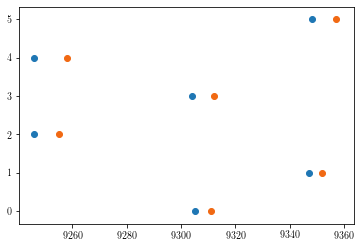

job_1531656020138_222626 39 has waves


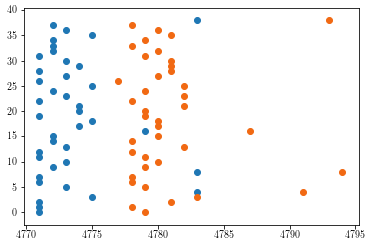

job_1531656020138_222959 290 has waves


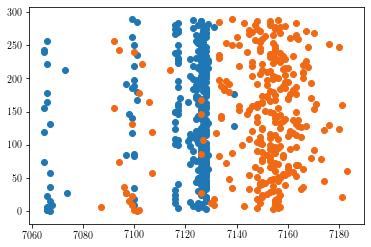

job_1531656020138_228203 371 has waves


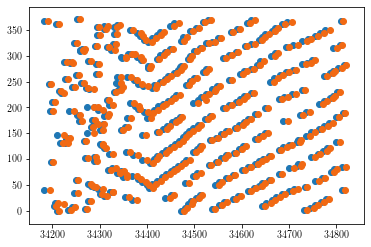

job_1531656020138_224579 22 has waves


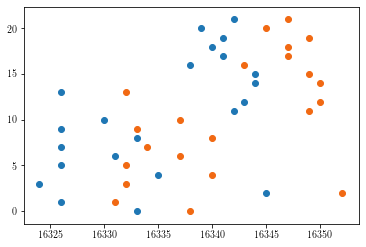

job_1531656020138_232486 248 has waves


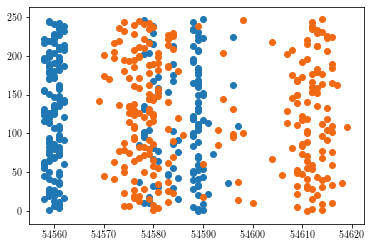

job_1531656020138_223271 25 has waves


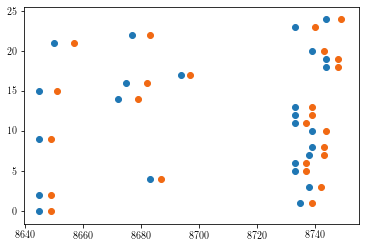

job_1531656020138_223023 80 has waves


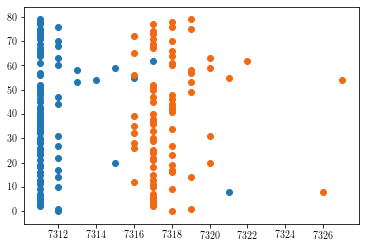

job_1531656020138_223330 46 has waves


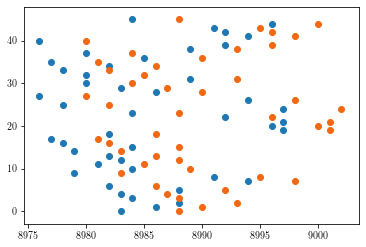

job_1531656020138_232873 100 has waves


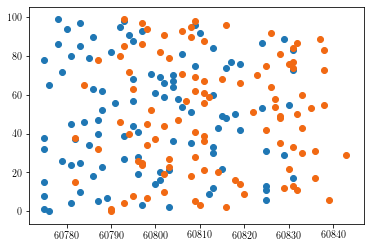

job_1531656020138_232367 9456 has waves


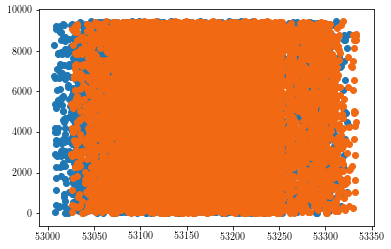

job_1531656020138_222520 522 has waves


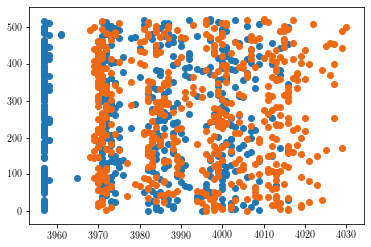

job_1531656020138_232260 136 has waves


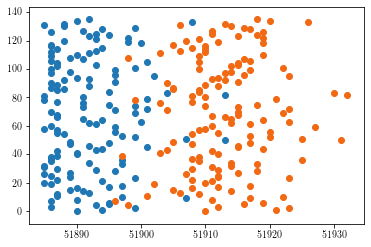

job_1531656020138_227954 55 has waves


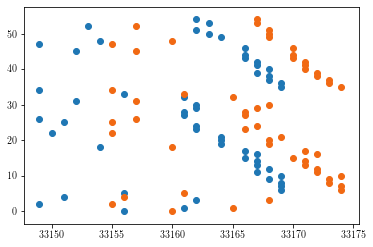

job_1531656020138_223287 36 has waves


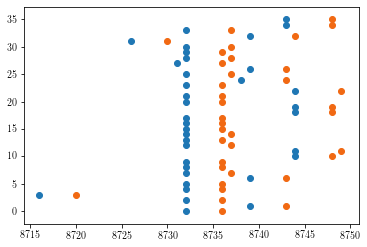

job_1531656020138_223012 11 has waves


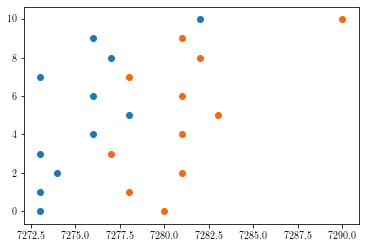

job_1531656020138_223605 66 has waves


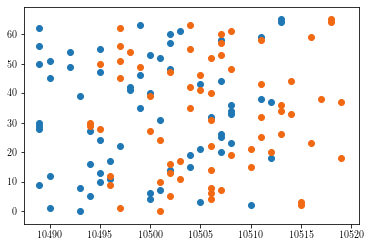

job_1531656020138_222237 377 has waves


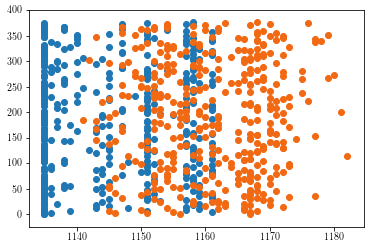

job_1531656020138_222632 10270 has waves


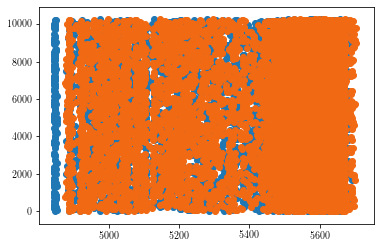

job_1531656020138_227788 55 has waves


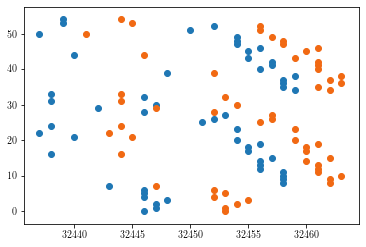

job_1531656020138_232106 2879 has waves


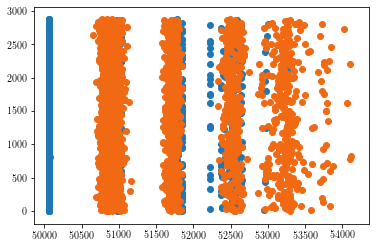

job_1531656020138_232137 8 has waves


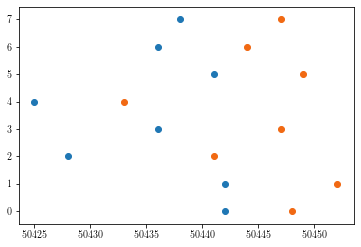

job_1531656020138_232562 484 has waves


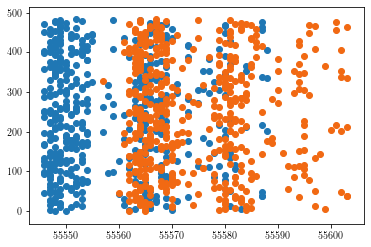

job_1531656020138_222873 100 has waves


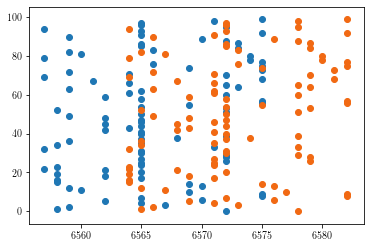

job_1531656020138_222295 1765 has waves


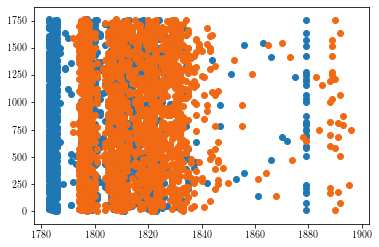

job_1531656020138_232894 127 has waves


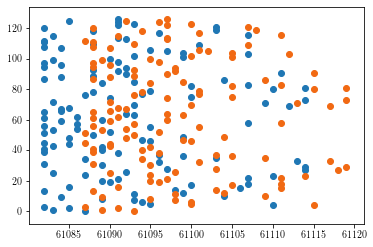

job_1531656020138_228002 897 has waves


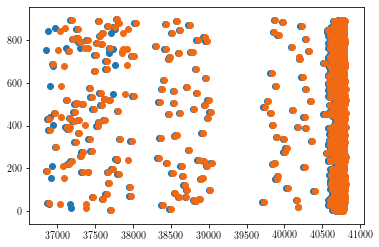

job_1531656020138_224417 490 has waves


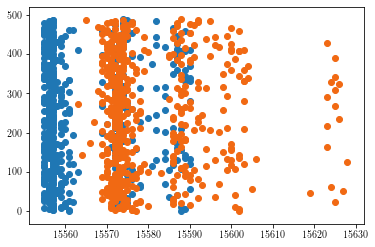

job_1531656020138_232124 2 has waves


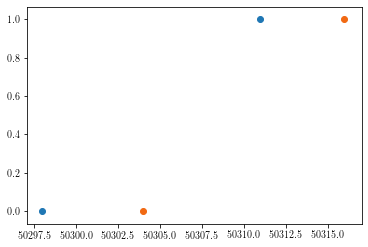

job_1531656020138_224070 113 has waves


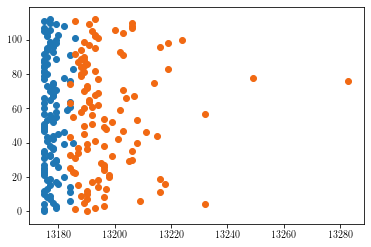

job_1531656020138_222933 70 has waves


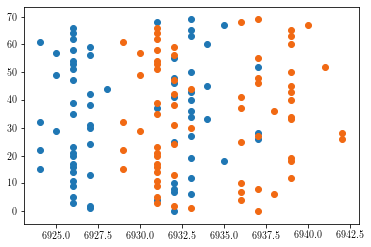

job_1531656020138_222160 57 has waves


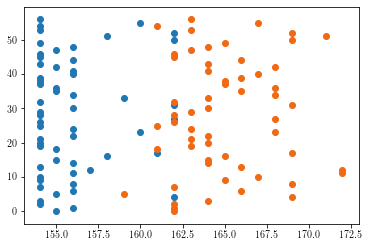

job_1531656020138_230022 94 has waves


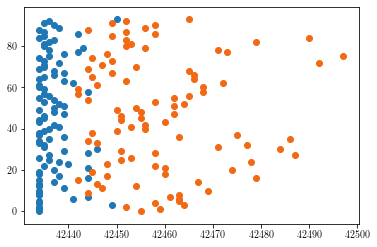

job_1531656020138_232818 1399 has waves


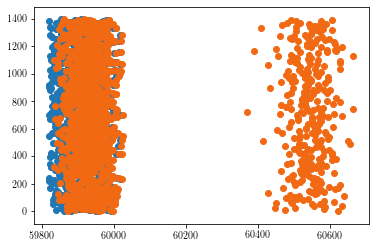

job_1531656020138_227509 34 has waves


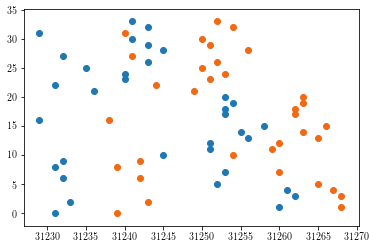

job_1531656020138_225574 79 has waves


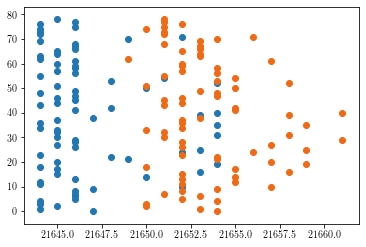

job_1531656020138_222884 100 has waves


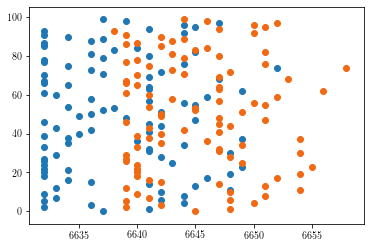

job_1531656020138_223120 25 has waves


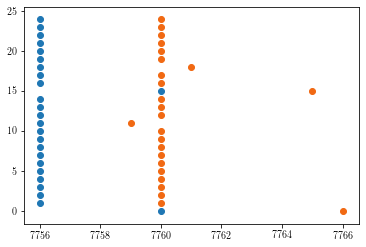

job_1531656020138_222650 2 has waves


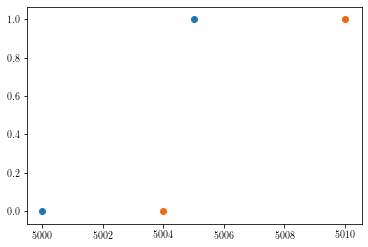

job_1531656020138_228011 55 has waves


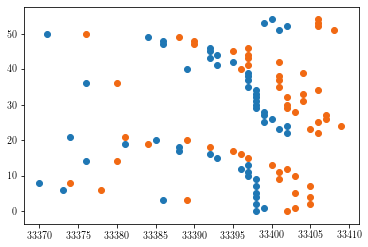

job_1531656020138_223232 25 has waves


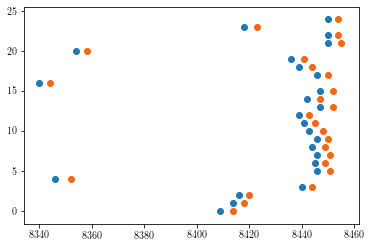

job_1531656020138_232154 28258 has waves


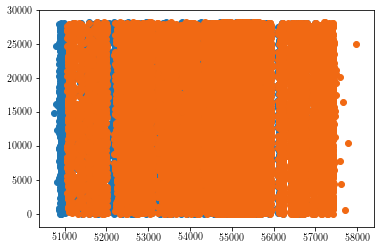

job_1531656020138_223634 9 has waves


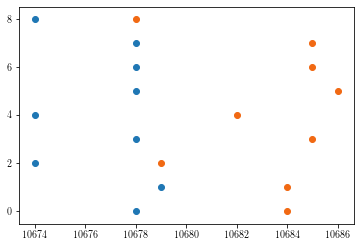

job_1531656020138_223941 27 has waves


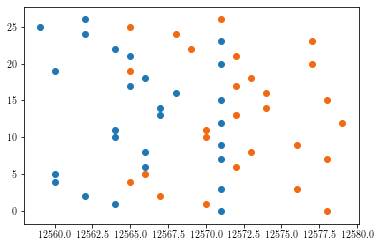

job_1531656020138_222831 10 has waves


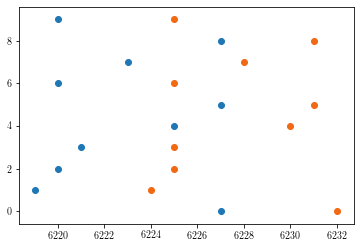

job_1531656020138_226740 32 has waves


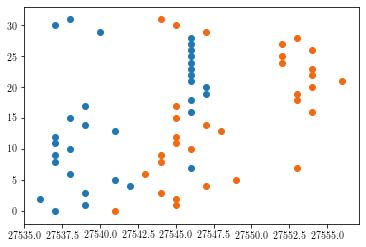

job_1531656020138_222286 1765 has waves


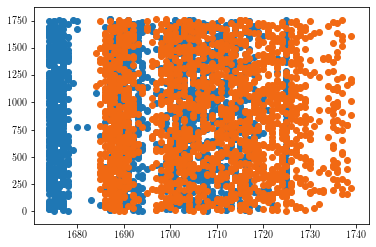

job_1531656020138_223409 87 has waves


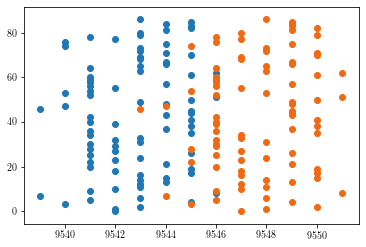

job_1531656020138_224365 23 has waves


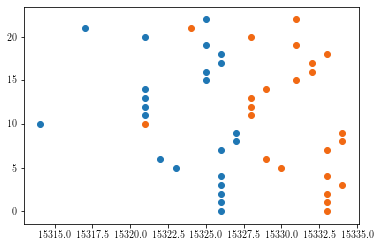

job_1531656020138_229916 100 has waves


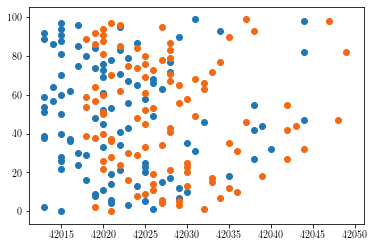

job_1531656020138_222673 583 has waves


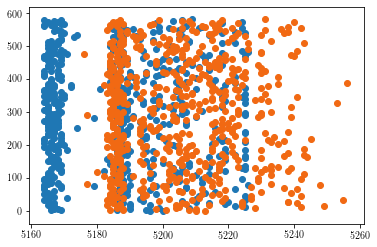

job_1531656020138_222836 89 has waves


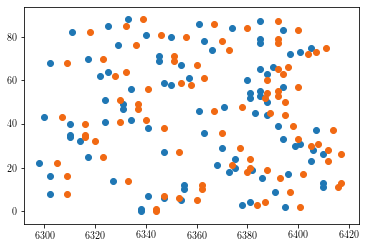

job_1531656020138_225497 5094 has waves


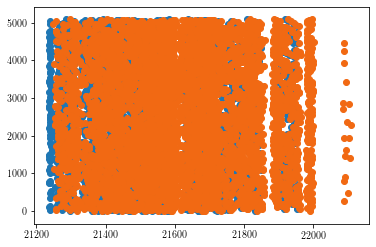

job_1531656020138_224121 26 has waves


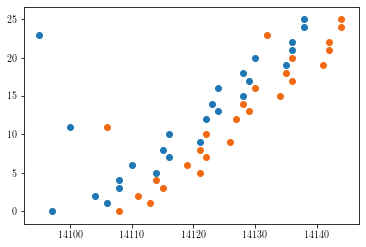

job_1531656020138_222948 94 has waves


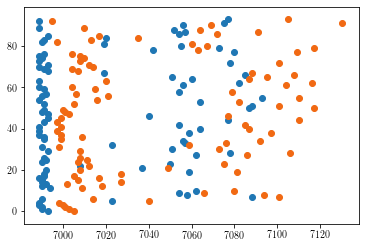

job_1531656020138_227538 24 has waves


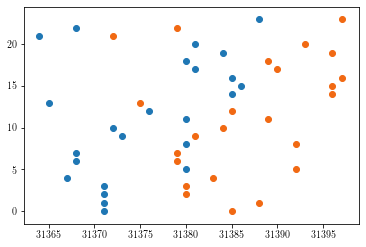

job_1531656020138_232419 414 has waves


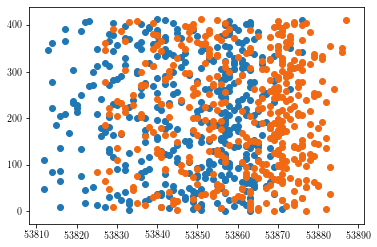

job_1531656020138_223009 90 has waves


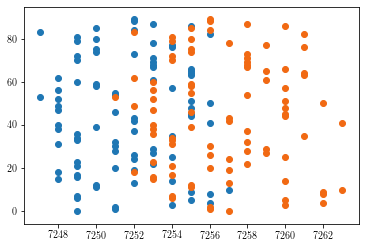

job_1531656020138_223274 84 has waves


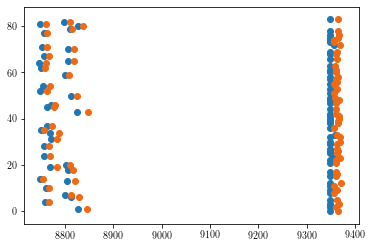

job_1531656020138_223602 1433 has waves


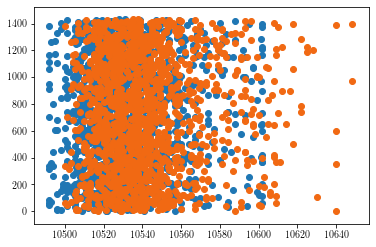

job_1531656020138_227336 133 has waves


KeyboardInterrupt: 

In [354]:
import ast

waves = {}

dir_names='/mnt/sda/asup-trace/'+dir_name+'/'
for idx, jid in df['jobid'].iteritems():
    with open(dir_names+jid+'/tasks/tasks.json', 'r') as fd:
        tasks = ast.literal_eval(fd.read())['tasks']['task']
        waves[jid] = {'total': len(tasks), 'maps': [], 'reduces':[]}
       # print(jid, len(tasks))
        for tsk in tasks:
            tsk['startTime'] = tsk['startTime']//1000 - datetime.timestamp(trace_starttime)
            tsk['finishTime'] = tsk['finishTime']//1000 - datetime.timestamp(trace_starttime)
            if tsk['type'] == 'MAP':
                waves[jid]['maps'].append({'start' : tsk['startTime'], 'end': tsk['finishTime']})
            elif tsk['type'] == 'REDUCE':
                waves[jid]['reduces'].append({'start' : tsk['startTime'], 'end': tsk['finishTime']})
    maps = pd.DataFrame(waves[jid]['maps'])
    if len(maps[maps['start'] > maps['end'].min()]):
        print(jid, len(waves[jid]['maps']), 'has waves')
        maps = waves[jid]['maps']
        starts = [x['start'] for x in maps]
        ends = [x['end'] for x in maps]

        plt.scatter(starts, range(0, len(starts)), marker='o');
        plt.scatter(ends, range(0, len(ends)), marker='o', color='#f16913');

        #plt.xlim(15509, 15527)

        plt.show()
    #if idx == 10000:
    #    break

Empty DataFrame
Columns: [start, end]
Index: []

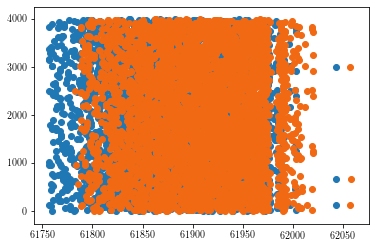

In [353]:
# Importing the matplotlb.pyplot 
import matplotlib.pyplot as plt 

jid1 = 'job_1531656020138_232947'
maps = waves[jid1]['maps']

starts = [x['start'] for x in maps]
ends = [x['end'] for x in maps]

plt.scatter(starts, range(0, len(starts)), marker='o');
plt.scatter(ends, range(0, len(ends)), marker='o', color='#f16913');

#plt.xlim(15509, 15527)

plt.show()
  